In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import cos, sin, sqrt, arctan2
import matplotlib.pyplot as plt
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from astropy.cosmology import Planck15
from scipy.special import sph_harm_y
import pint
from pint.models import get_model
import glob, os #glob2
from astropy import units as u
from astropy.coordinates import SkyCoord
from gwbird import detectors
from gwbird import skymap
from gwbird import utils
from gwbird.overlap import Response
from gwbird.nell import AngularResponse
from gwbird import overlap
from gwbird import nell
from gwbird import skymap
from gwbird import utils
from gwbird import detectors
from gwbird import pls
from gwbird.NANOGrav import NANOGrav_dir
from gwbird.nell import AngularResponse, Sensitivity_ell
import matplotlib.cm as cm


plt.rcParams['figure.dpi'] = 200
REarth = 6.371 * 1e6 #m
c = 3*1e8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# check the normalization constant for PTAs for the different polarization

N, pulsar_xyz, DIST_array = detectors.get_NANOGrav_pulsars()
p = pulsar_xyz
d = DIST_array 

f = np.logspace(-9, -7, 100)

for i in range(N):
    print(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[i], float(d[i]), float(d[i]), 'v')[0])

2025-05-07 13:51:51.929 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


16.478563659774434
16.65168382567945
16.70902555938026
19.40292851160613
15.717474408779795
15.363156960173963
18.368848907290996
19.046634954055445
17.534345237307125
13.63192584396727
14.105581736626306
15.901006469471708
16.89668627050635
16.636423865263037
17.301982045457727
14.474036654836867
18.53404088421713
17.27948801995924
18.443481123848667
19.927662224157054
15.970177315103008
15.886523971221571
15.508578793863297
10.653492636634374
18.258012742153202
22.800447040358755
13.922237703805749
16.82819032004053
12.949625612543244
16.64305216753693
20.130728770530887
16.08012010641727
17.180397598019518
8.951013611440997
19.111961795316656
13.80917016804193
15.963080215889573
13.711452403357388
18.137879969584503
15.743967126788316
19.926890676871412
12.499774082155795
19.908854290375803
16.03538092505316
15.852838203016187
9.41091146788814
18.362275456694316
16.799499385038224
17.22920356730208
12.72043633747954
14.842583790176267
20.84271572191145
16.99523629092685
20.432828023

In [12]:
gamma_ij_t = []
gamma_ij_v = []
gamma_ij_s = []
gamma_ij_l = []
gamma_ij_V = []
alpha_ij = []
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma_ij_t.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], 't'))
        gamma_ij_v.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'v'))
        gamma_ij_s.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'s'))
        gamma_ij_l.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'l'))
        gamma_ij_V.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'V'))

gamma_ij_t = np.array(gamma_ij_t)
gamma_ij_v = np.array(gamma_ij_v)
gamma_ij_s = np.array(gamma_ij_s)
gamma_ij_l = np.array(gamma_ij_l)
gamma_ij_V = np.array(gamma_ij_V)
alpha_ij = np.array(alpha_ij)



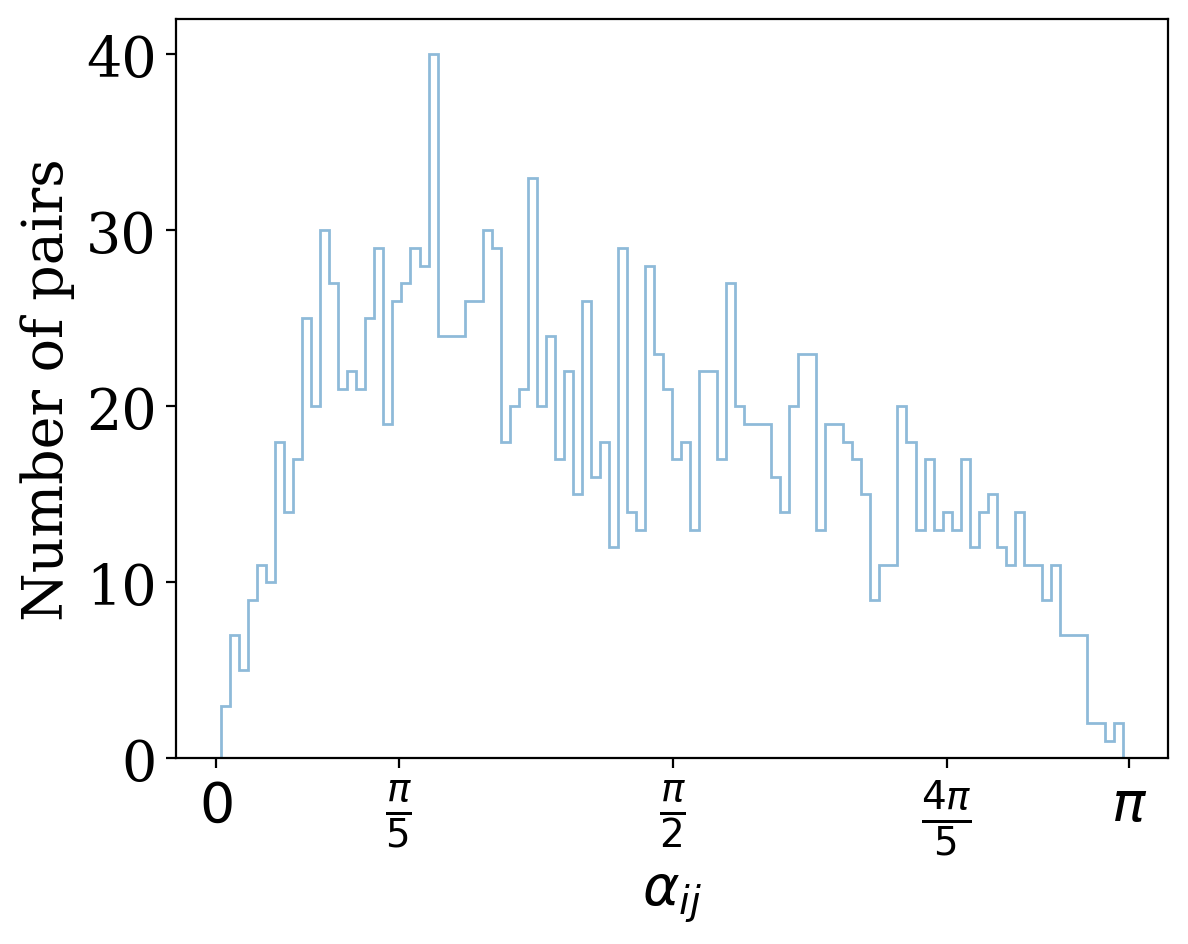

In [13]:
# angular separation between pulsars in radians in a histogram

from matplotlib.ticker import MultipleLocator, FuncFormatter

def custom_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi / 5:
        return r'$\frac{\pi}{5}$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 4 * np.pi / 5:
        return r'$\frac{4\pi}{5}$'
    elif x == np.pi:
        return r'$\pi$'
    else:
        return ''



# Definire i tick personalizzati
custom_ticks = [0, np.pi / 5, np.pi / 2, 4 * np.pi / 5, np.pi]


plt.hist(alpha_ij, bins=100, histtype='step', alpha=0.5)
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel('Number of pairs')

#plt.title('Angular separation between pulsars')
plt.xticks(custom_ticks, [r'$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{4\pi}{5}$', r'$\pi$'])
plt.show()

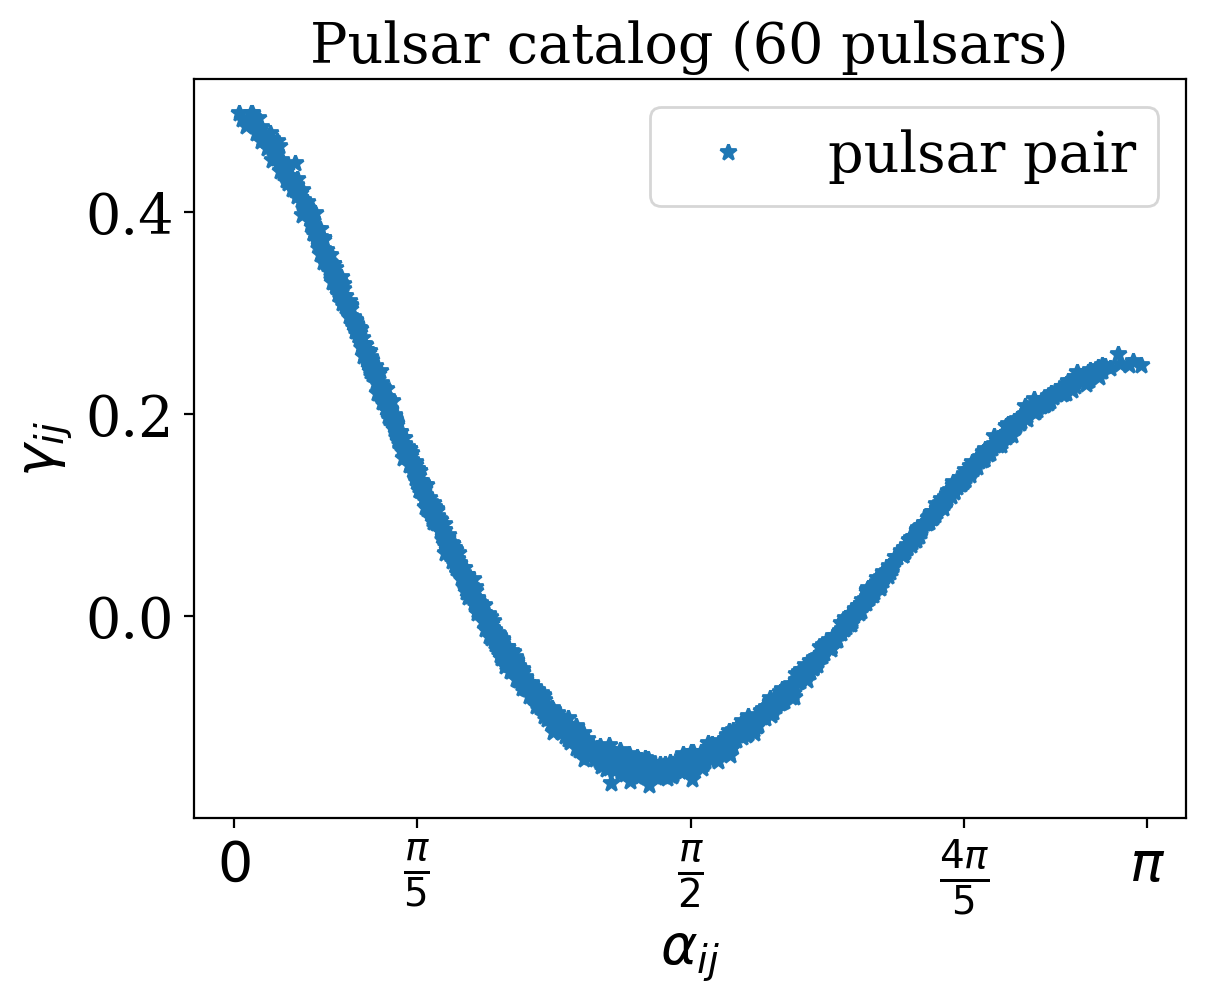

In [14]:
plt.plot(alpha_ij, gamma_ij_t[:,0], '*', label='pulsar pair')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.xticks(custom_ticks, [r'$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{4\pi}{5}$', r'$\pi$'])
plt.title('Pulsar catalog (60 pulsars)')
plt.legend()
plt.show()

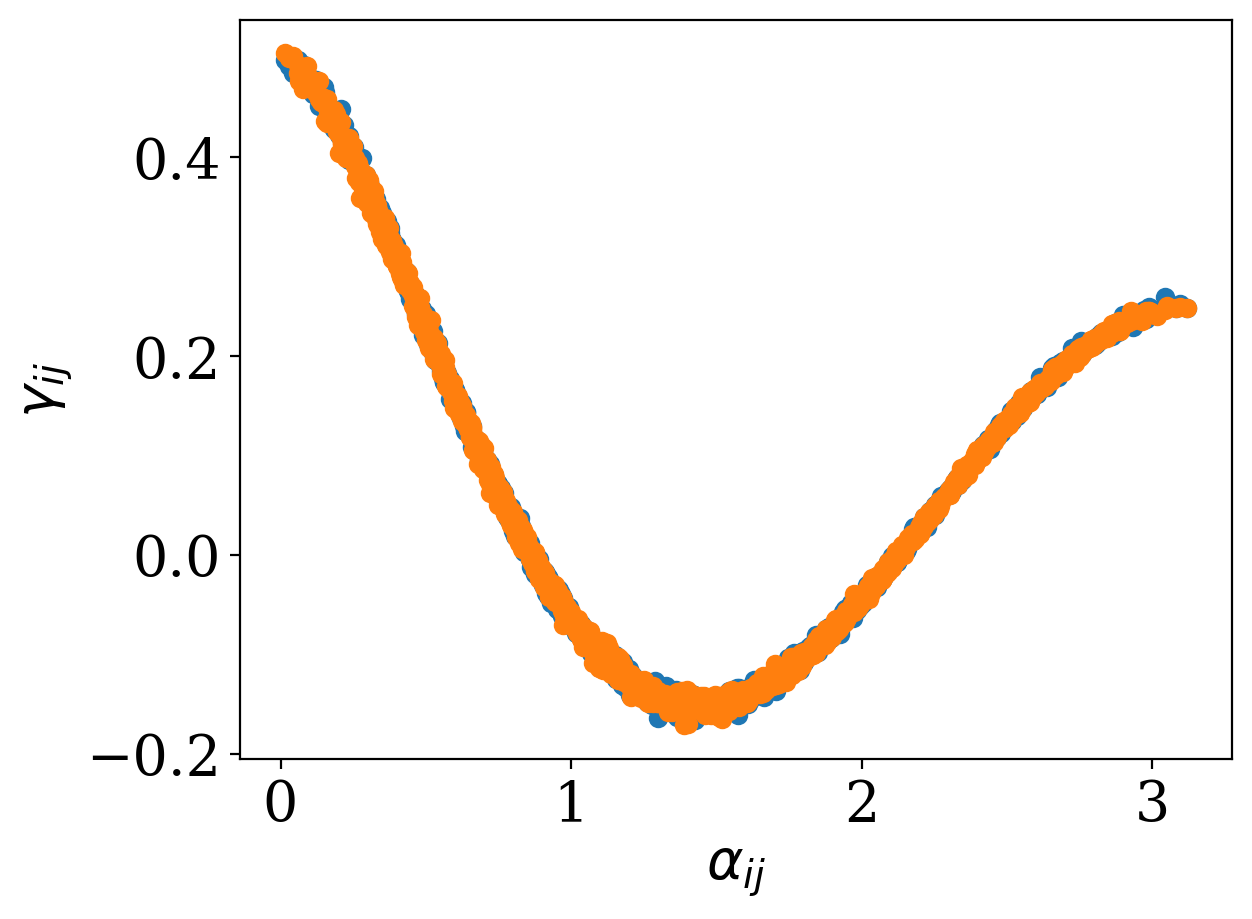

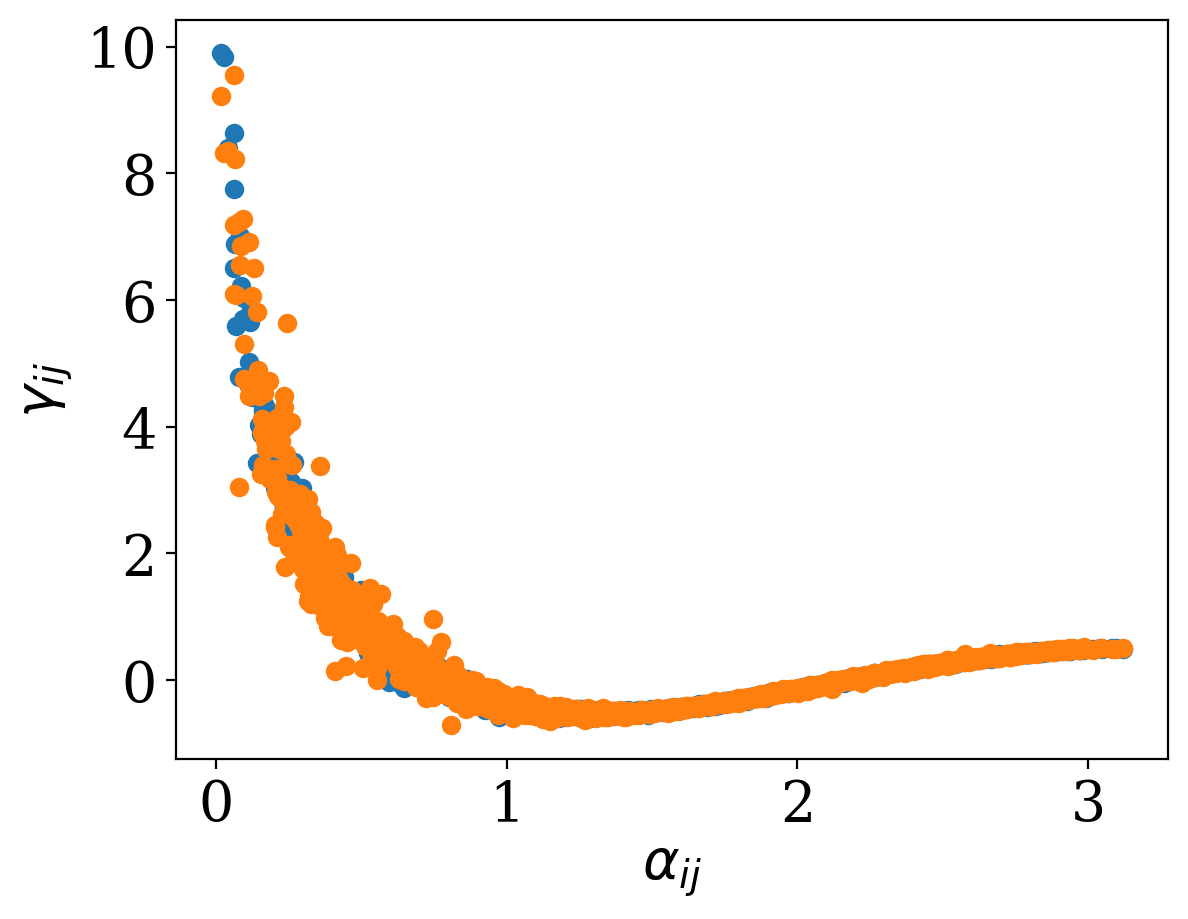

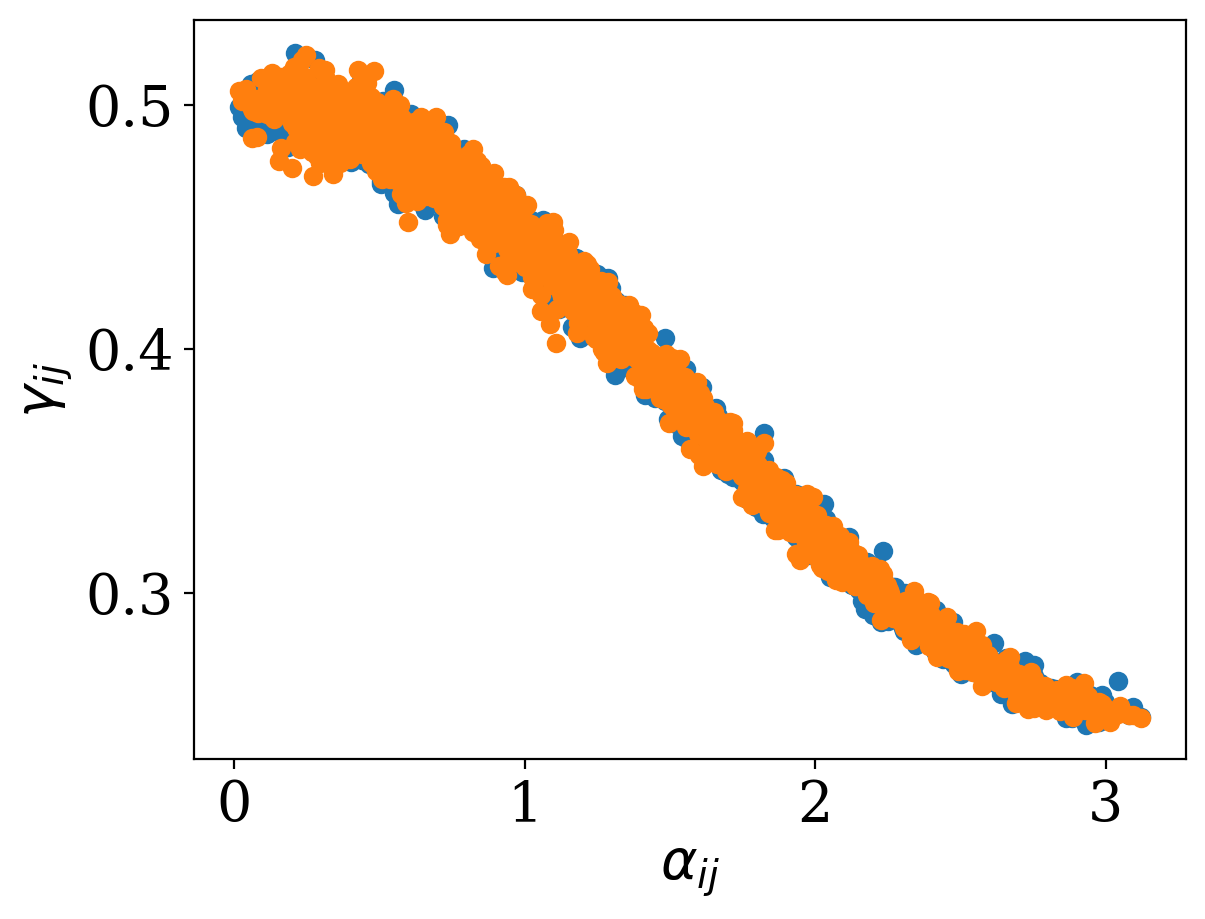

In [7]:

plt.plot(alpha_ij, gamma_ij_t[:,0], 'o')
plt.plot(alpha_ij, gamma_ij_t[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma_ij_v[:,0], 'o')
plt.plot(alpha_ij, gamma_ij_v[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma_ij_s[:,0], 'o')
plt.plot(alpha_ij, gamma_ij_s[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()

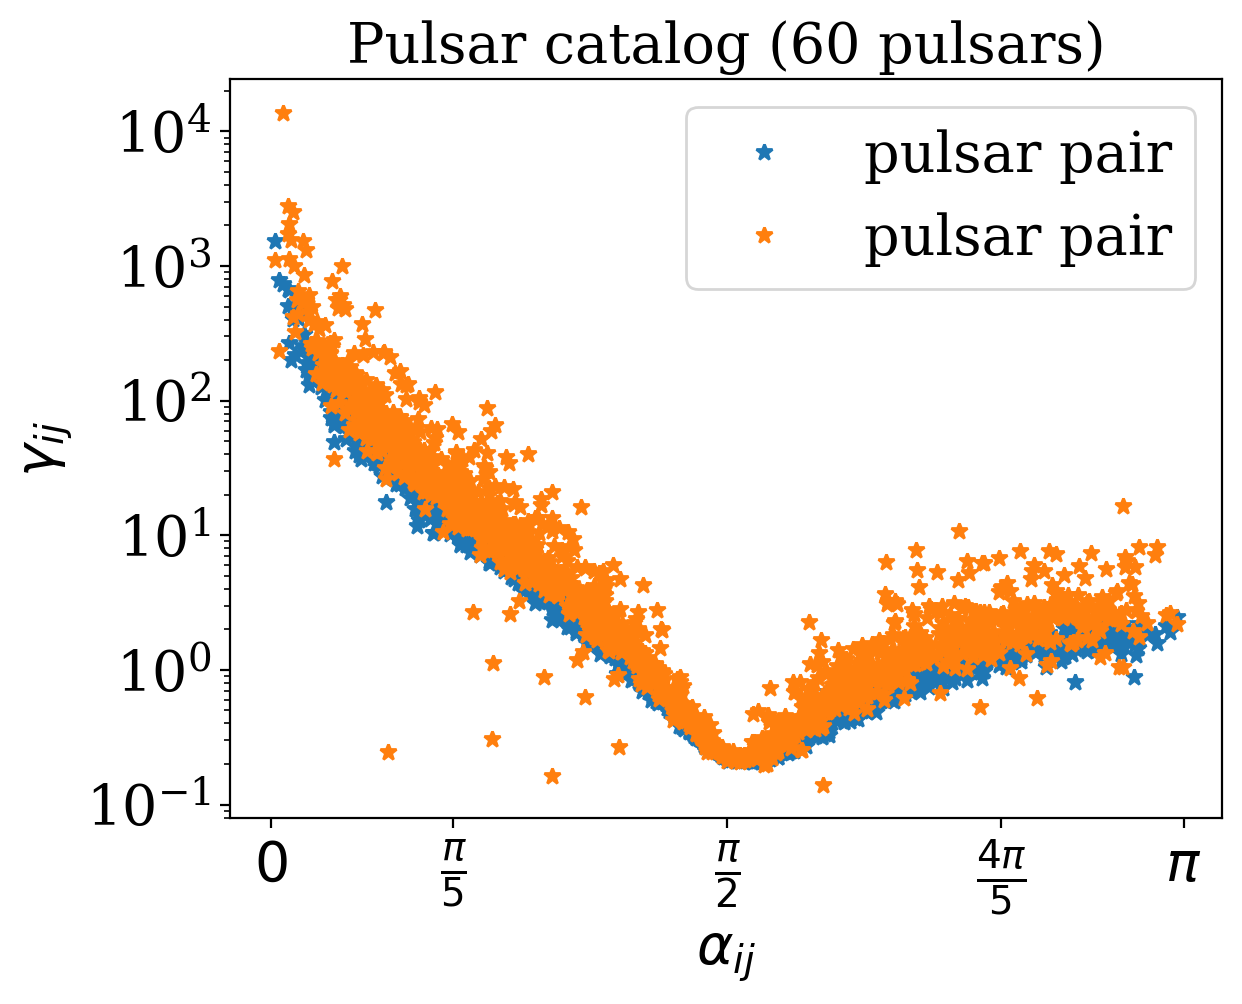

In [8]:
plt.plot(alpha_ij, gamma_ij_l[:,0], '*', label='pulsar pair')
plt.plot(alpha_ij, gamma_ij_l[:,-1], '*', label='pulsar pair')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.xticks(custom_ticks, [r'$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{4\pi}{5}$', r'$\pi$'])
plt.title('Pulsar catalog (60 pulsars)')
plt.yscale('log')
plt.legend()
plt.show()

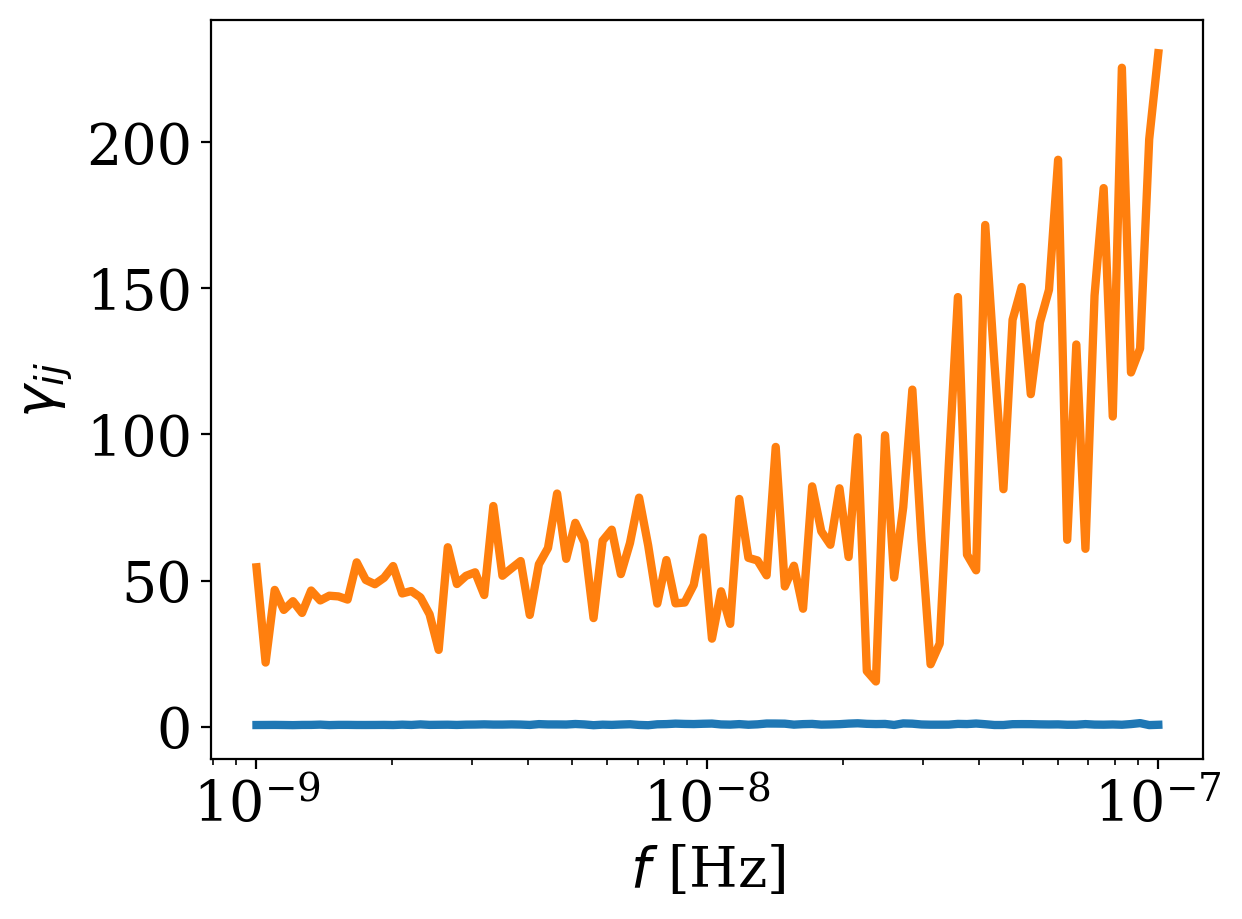

In [9]:
plt.plot(f, gamma_ij_l[0,:], label='pulsar pair')
plt.plot(f, gamma_ij_l[-1,:], label='pulsar pair')
plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'$\gamma_{ij}$')
plt.xscale('log')

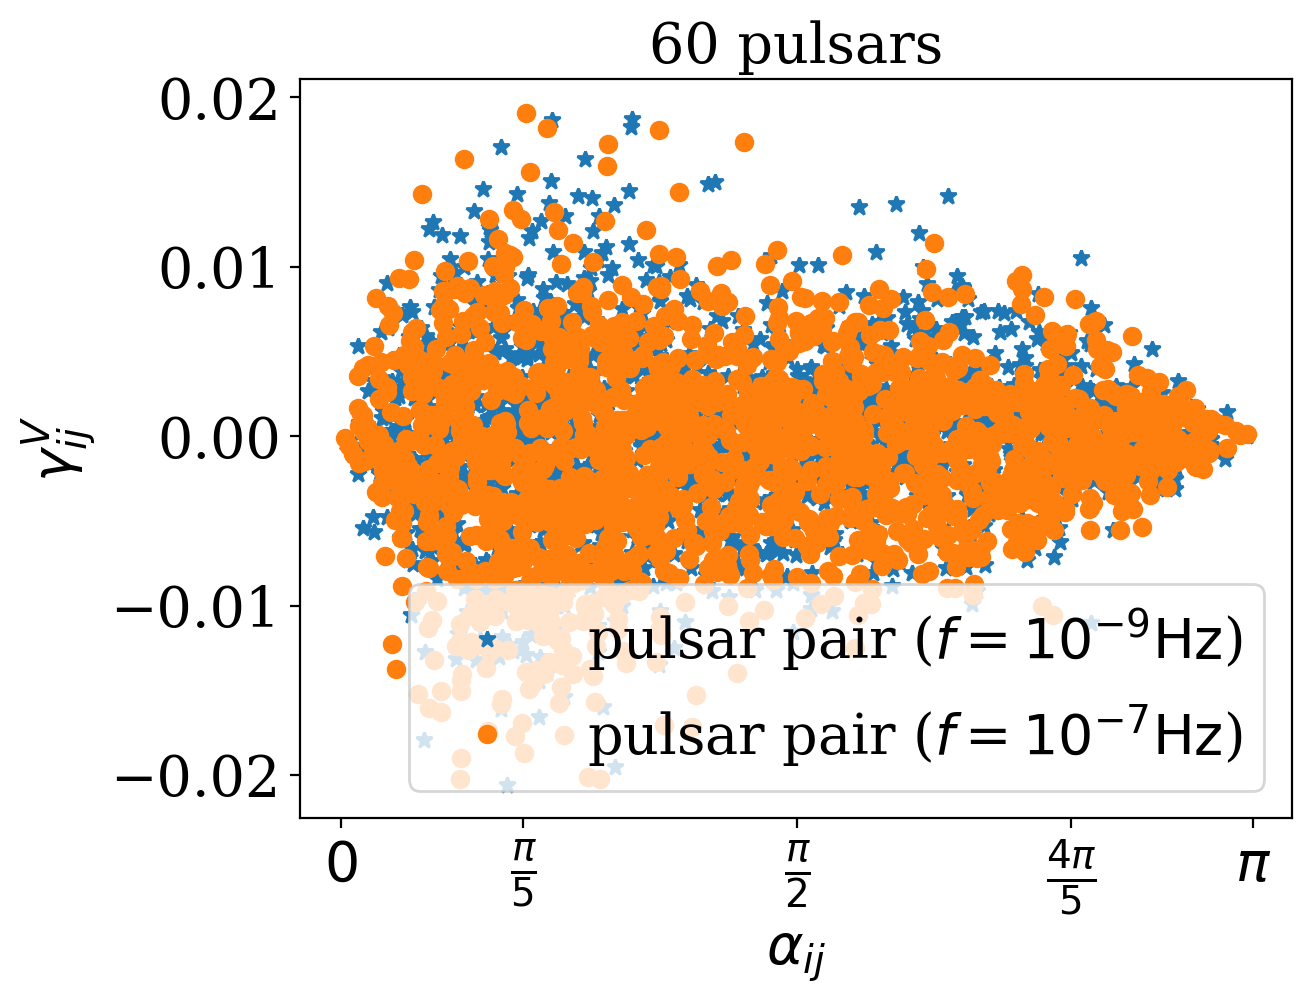

In [10]:
plt.plot(alpha_ij, gamma_ij_V[:,0], '*', label=r'pulsar pair ($f=10^{-9} \rm Hz$)')
plt.plot(alpha_ij, gamma_ij_V[:,-1], 'o', label=r'pulsar pair ($f=10^{-7} \rm Hz$)')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}^{V}$')
plt.xticks(custom_ticks, [r'$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{4\pi}{5}$', r'$\pi$'])
plt.title('60 pulsars')
plt.legend()
plt.show()

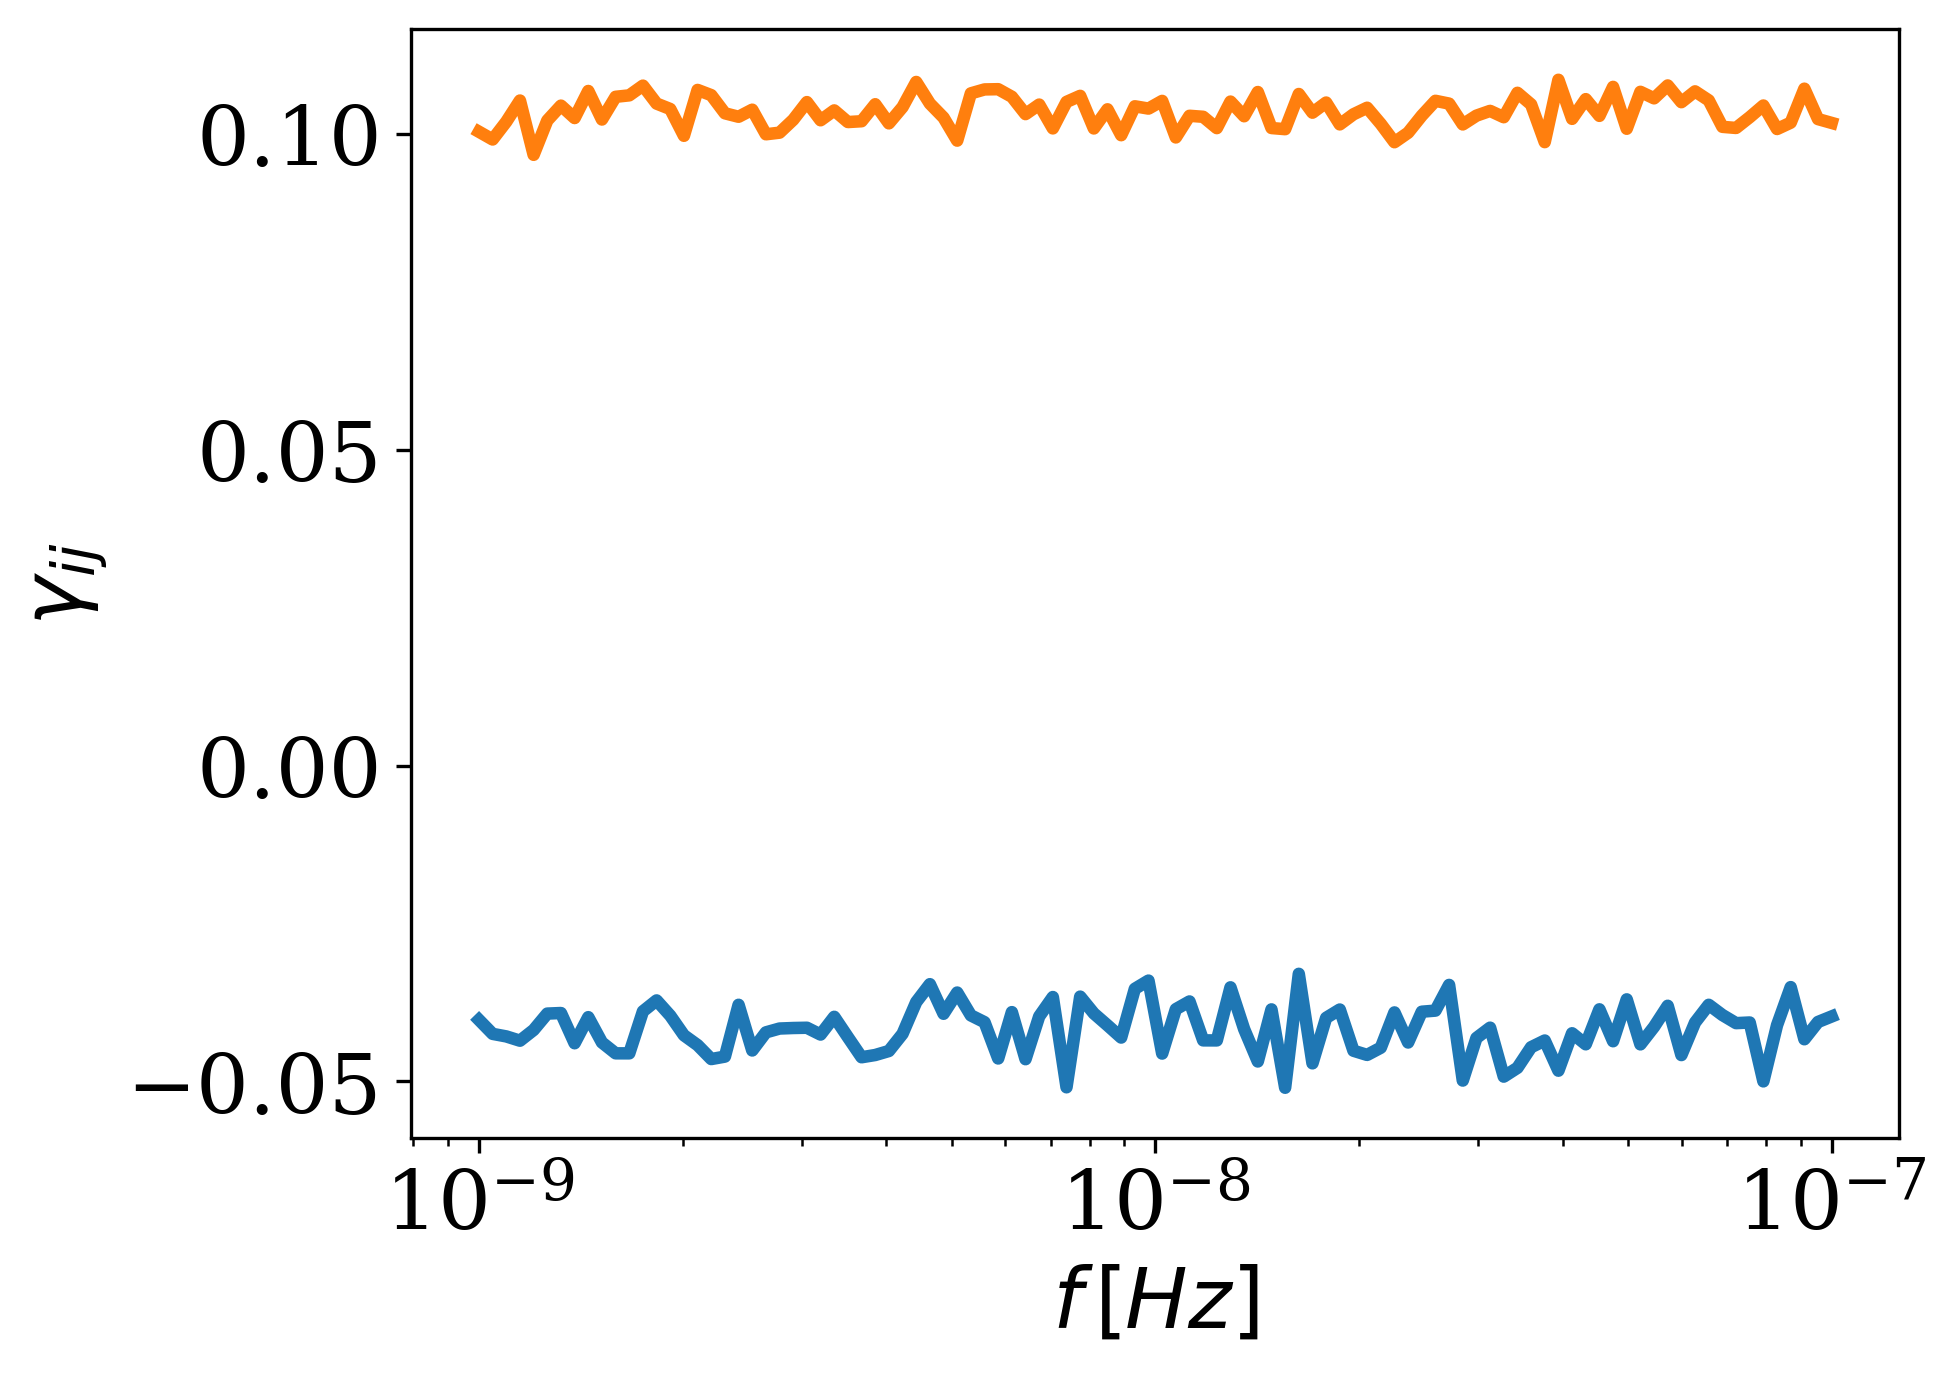

In [ ]:
plt.plot(f, gamma_ij_t[0,:])
plt.plot(f, gamma_ij_t[20,:])
plt.xlabel(r'$f \, [Hz]$')
plt.ylabel(r'$\gamma_{ij}$')
plt.xscale('log')
plt.show()

In [ ]:
print(gamma_ij_t.shape)

(1770, 100)


In [ ]:
# hellings  downs curve

def hellings_downs(alpha):
    return 0.5 + (3*(1- np.cos(alpha))/4 * (np.log(0.5*(1-np.cos(alpha)))- 1/6))

def hellings_downs_breathing(alpha):
    return (3 + np.cos(alpha)) / 8

alpha = np.linspace(0.01, np.pi, 100)
hd = hellings_downs(alpha)
hd_breathing = hellings_downs_breathing(alpha)

In [ ]:
# find the index corresponding to a frequency of 1e-8
f = np.logspace(-9, -7, 100)
f_index = np.argmin(np.abs(f - 1e-8))
gamma_ij_t_10_8 = gamma_ij_t[:,f_index]
gamma_ij_v_10_8 = gamma_ij_v[:,f_index]
gamma_ij_s_10_8 = gamma_ij_s[:,f_index]


49


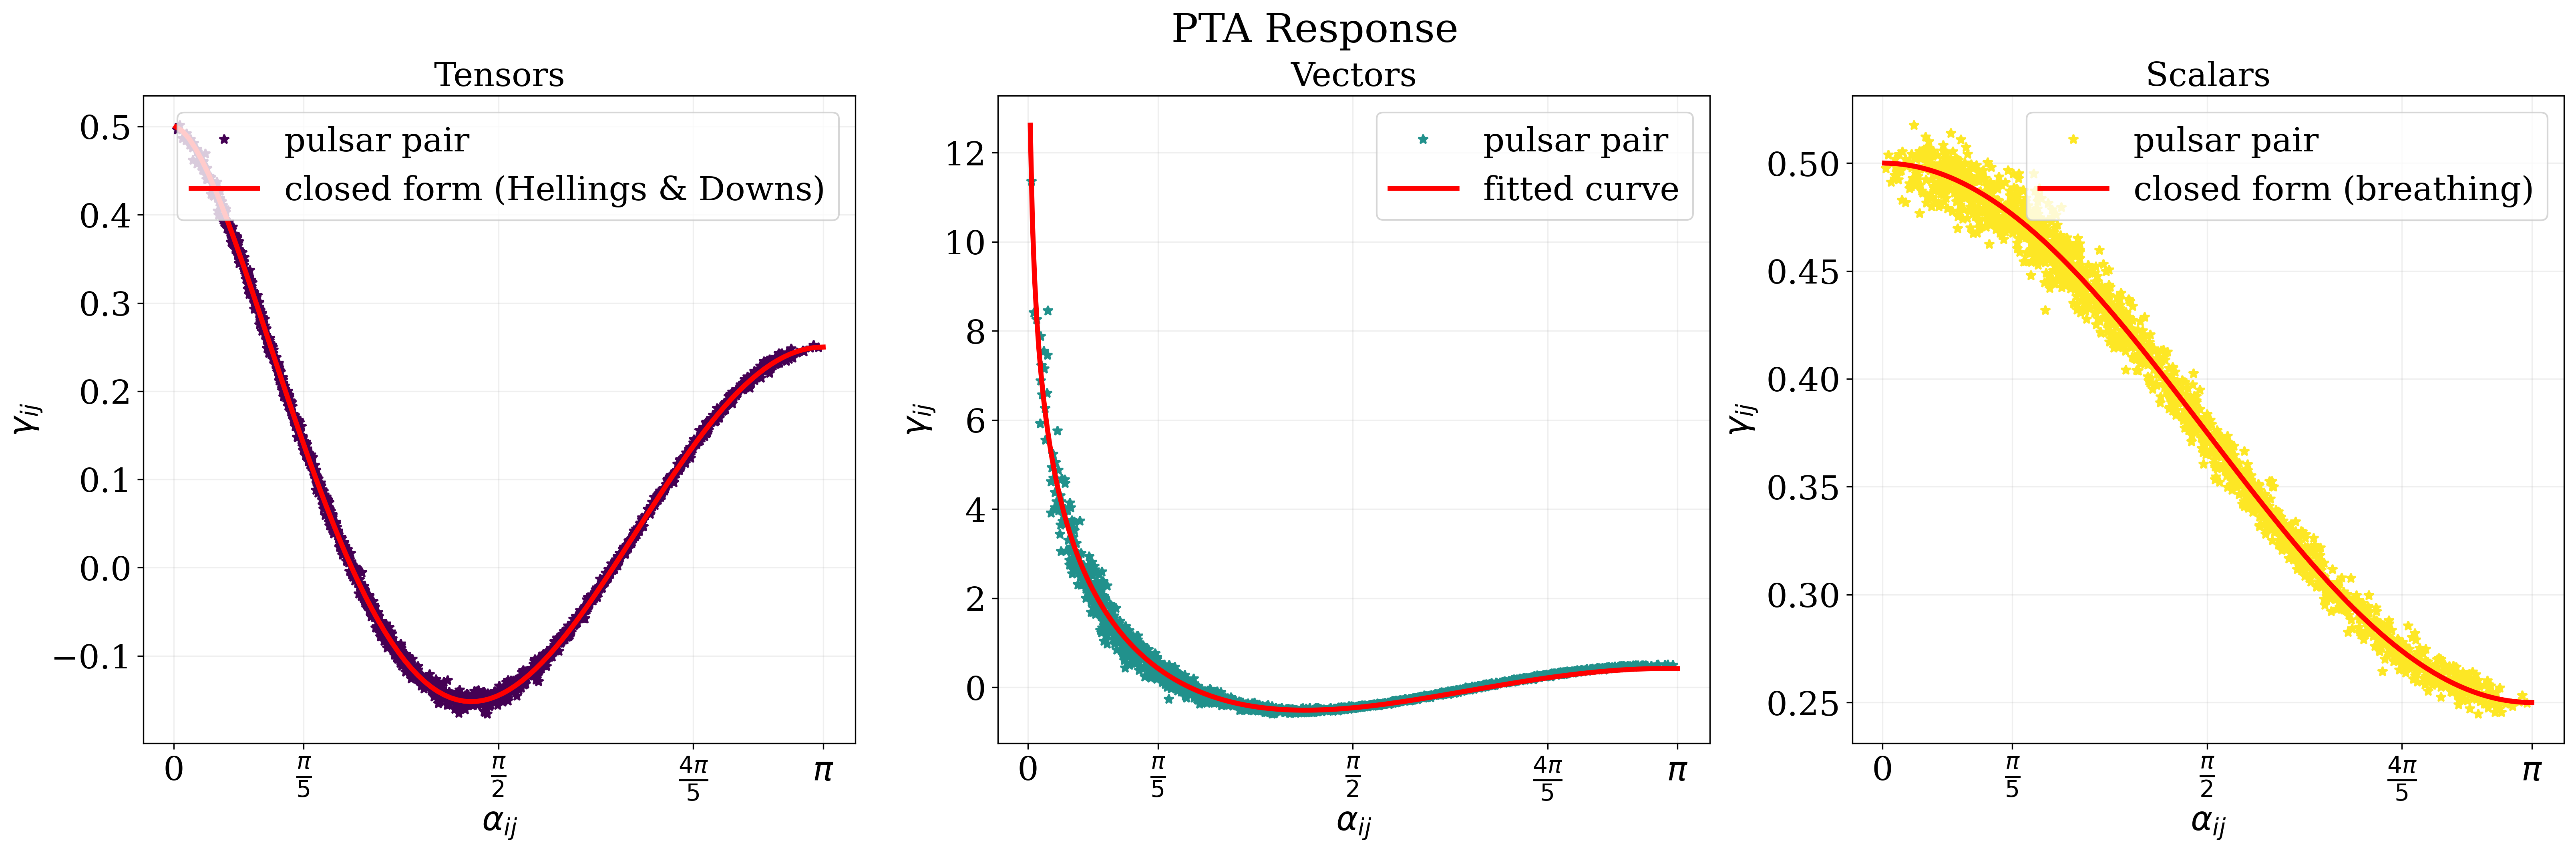

In [ ]:
colors = cm.viridis(np.linspace(0, 1, 3))

def model_exp_cos(alpha, A, B, C, D, E):
    return A * np.log(B * alpha) + C * np.cos(D * alpha + E )
alpha_fit = np.linspace(0, np.pi, 300)
gamma_fit_easy = model_exp_cos(alpha_fit, -np.pi, 0.674, -3, 0.813, 2/10)


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

def custom_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi / 5:
        return r'$\frac{\pi}{5}$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 4 * np.pi / 5:
        return r'$\frac{4\pi}{5}$'
    elif x == np.pi:
        return r'$\pi$'
    else:
        return ''

fig, ax = plt.subplots(1, 3, figsize=(26, 7))

# Definire i tick personalizzati
custom_ticks = [0, np.pi / 5, np.pi / 2, 4 * np.pi / 5, np.pi]

# Plot per Tensors
ax[0].plot(alpha_ij, gamma_ij_t_10_8, '*', color=colors[0], label='pulsar pair')
ax[0].plot(alpha, hd, '-', color='red', label='closed form (Hellings & Downs)')
ax[0].set_xlabel(r'$\alpha_{ij}$')
ax[0].set_ylabel(r'$\gamma_{ij}$')
ax[0].grid(which='both', alpha=0.2)
ax[0].set_title('Tensors')
ax[0].set_xticks(custom_ticks)
ax[0].legend()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

# Plot per Vectors
ax[1].plot(alpha_ij, gamma_ij_v_10_8, '*', color=colors[1], label='pulsar pair')
ax[1].plot(alpha_fit, gamma_fit_easy, '-', color='red', label='fitted curve')
ax[1].set_xlabel(r'$\alpha_{ij}$')
ax[1].set_ylabel(r'$\gamma_{ij}$')
ax[1].grid(which='both', alpha=0.2)
ax[1].set_title('Vectors')
ax[1].set_xticks(custom_ticks)
ax[1].legend()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

# Plot per Scalars
ax[2].plot(alpha_ij, gamma_ij_s_10_8, '*', color=colors[2], label='pulsar pair')
ax[2].plot(alpha, hd_breathing, '-', color='red', label='closed form (breathing)')
ax[2].set_xlabel(r'$\alpha_{ij}$')
ax[2].set_ylabel(r'$\gamma_{ij}$')
ax[2].grid(which='both', alpha=0.2)
ax[2].legend()
ax[2].set_title('Scalars')
ax[2].set_xticks(custom_ticks)
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

# definisci un titolo globale
fig.suptitle('PTA Response')

plt.show()

$\gamma_{ij}^{\ell}$ as a function of the angular separation between pulsars

In [ ]:
gamma1_ij_t = []
gamma1_ij_v = []
gamma1_ij_s = []
alpha_ij = []
ell=1
psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma1_ij_t.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 't', psi))
        gamma1_ij_v.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 'v', psi))
        gamma1_ij_s.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 's', psi))

gamma1_ij_t = np.array(gamma1_ij_t)
gamma1_ij_v = np.array(gamma1_ij_v)
gamma1_ij_s = np.array(gamma1_ij_s)
alpha_ij = np.array(alpha_ij)

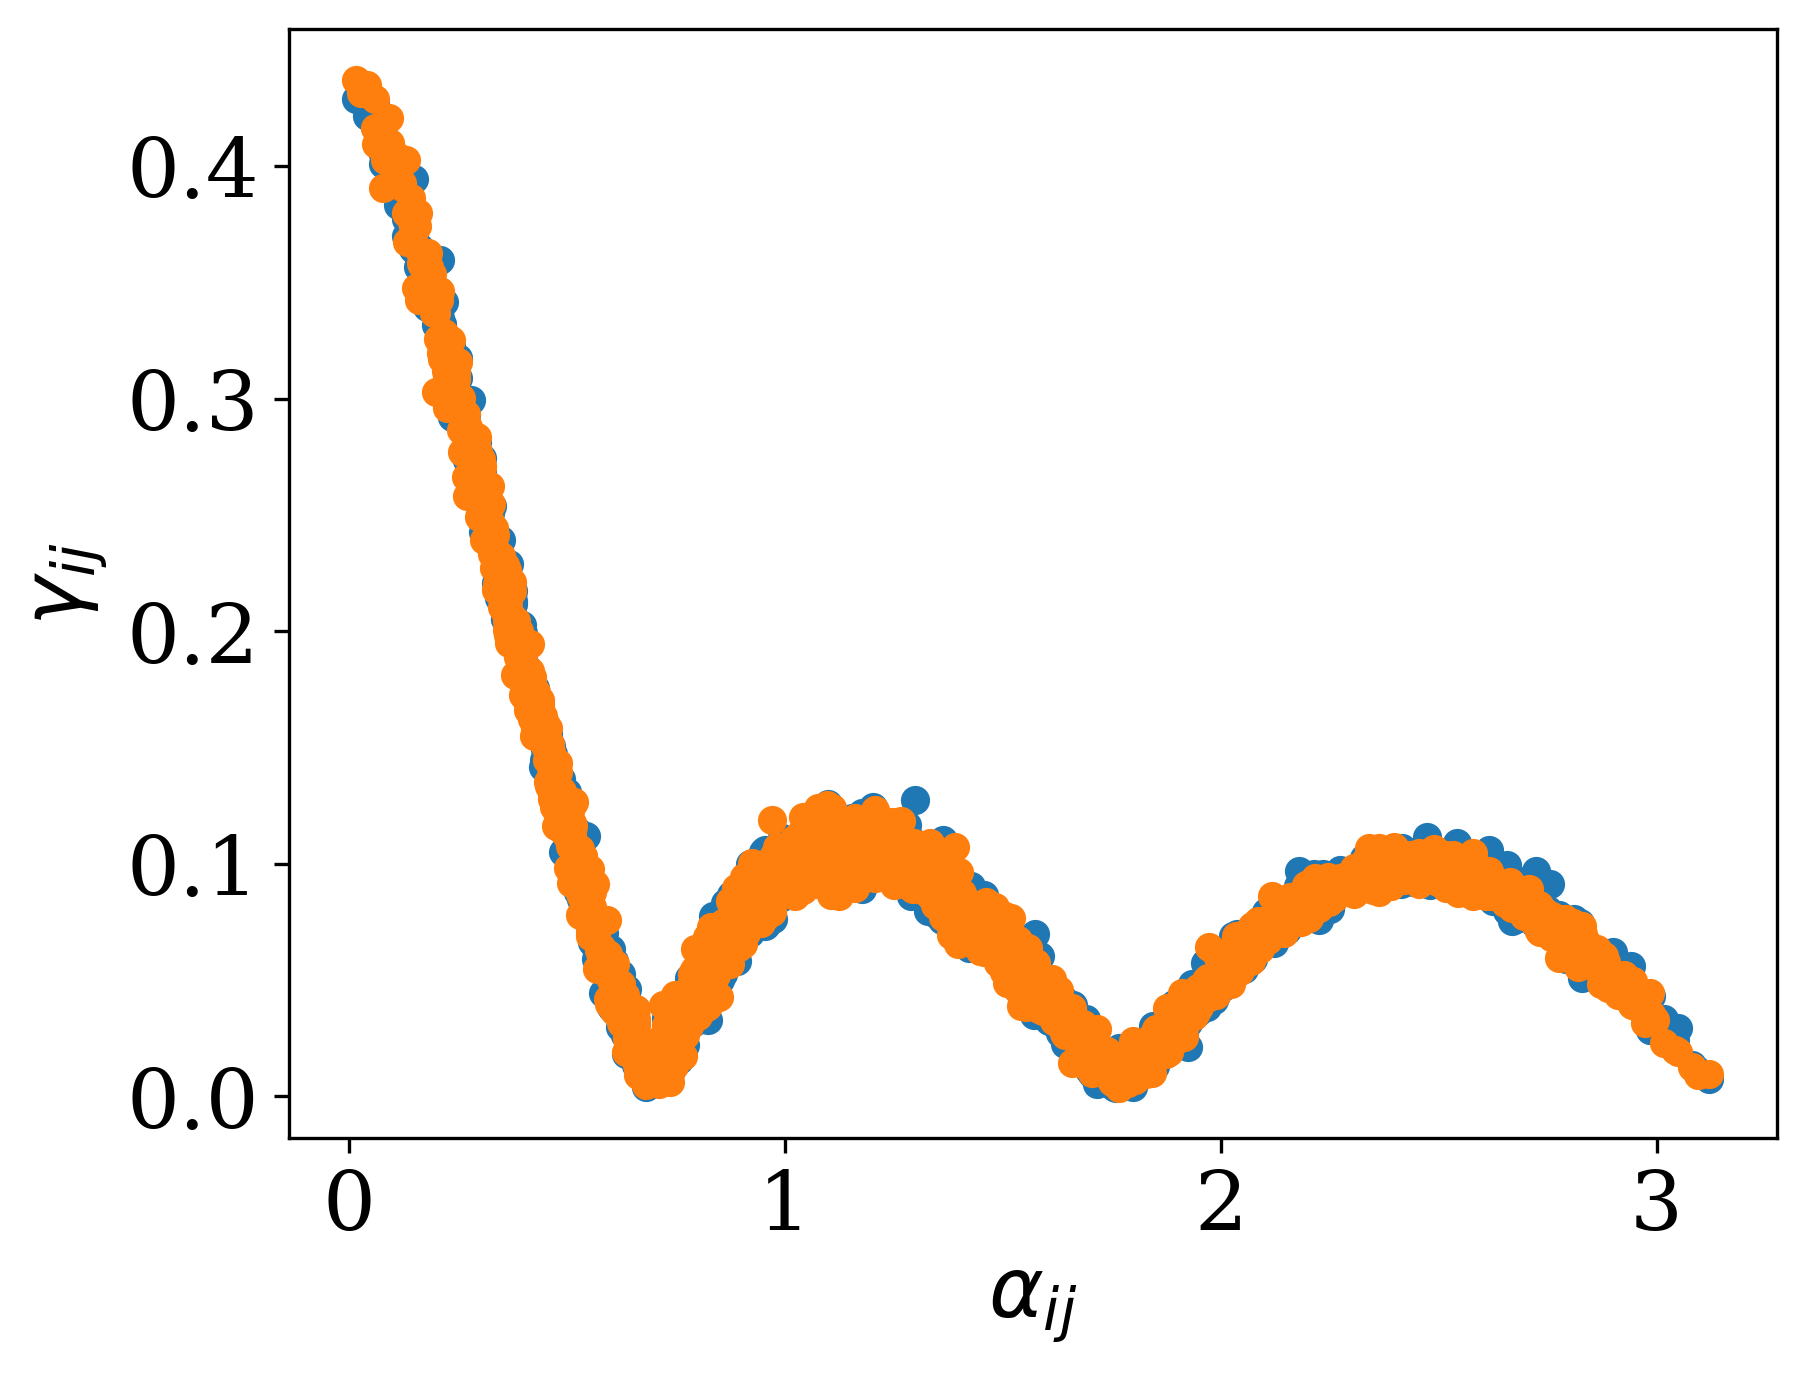

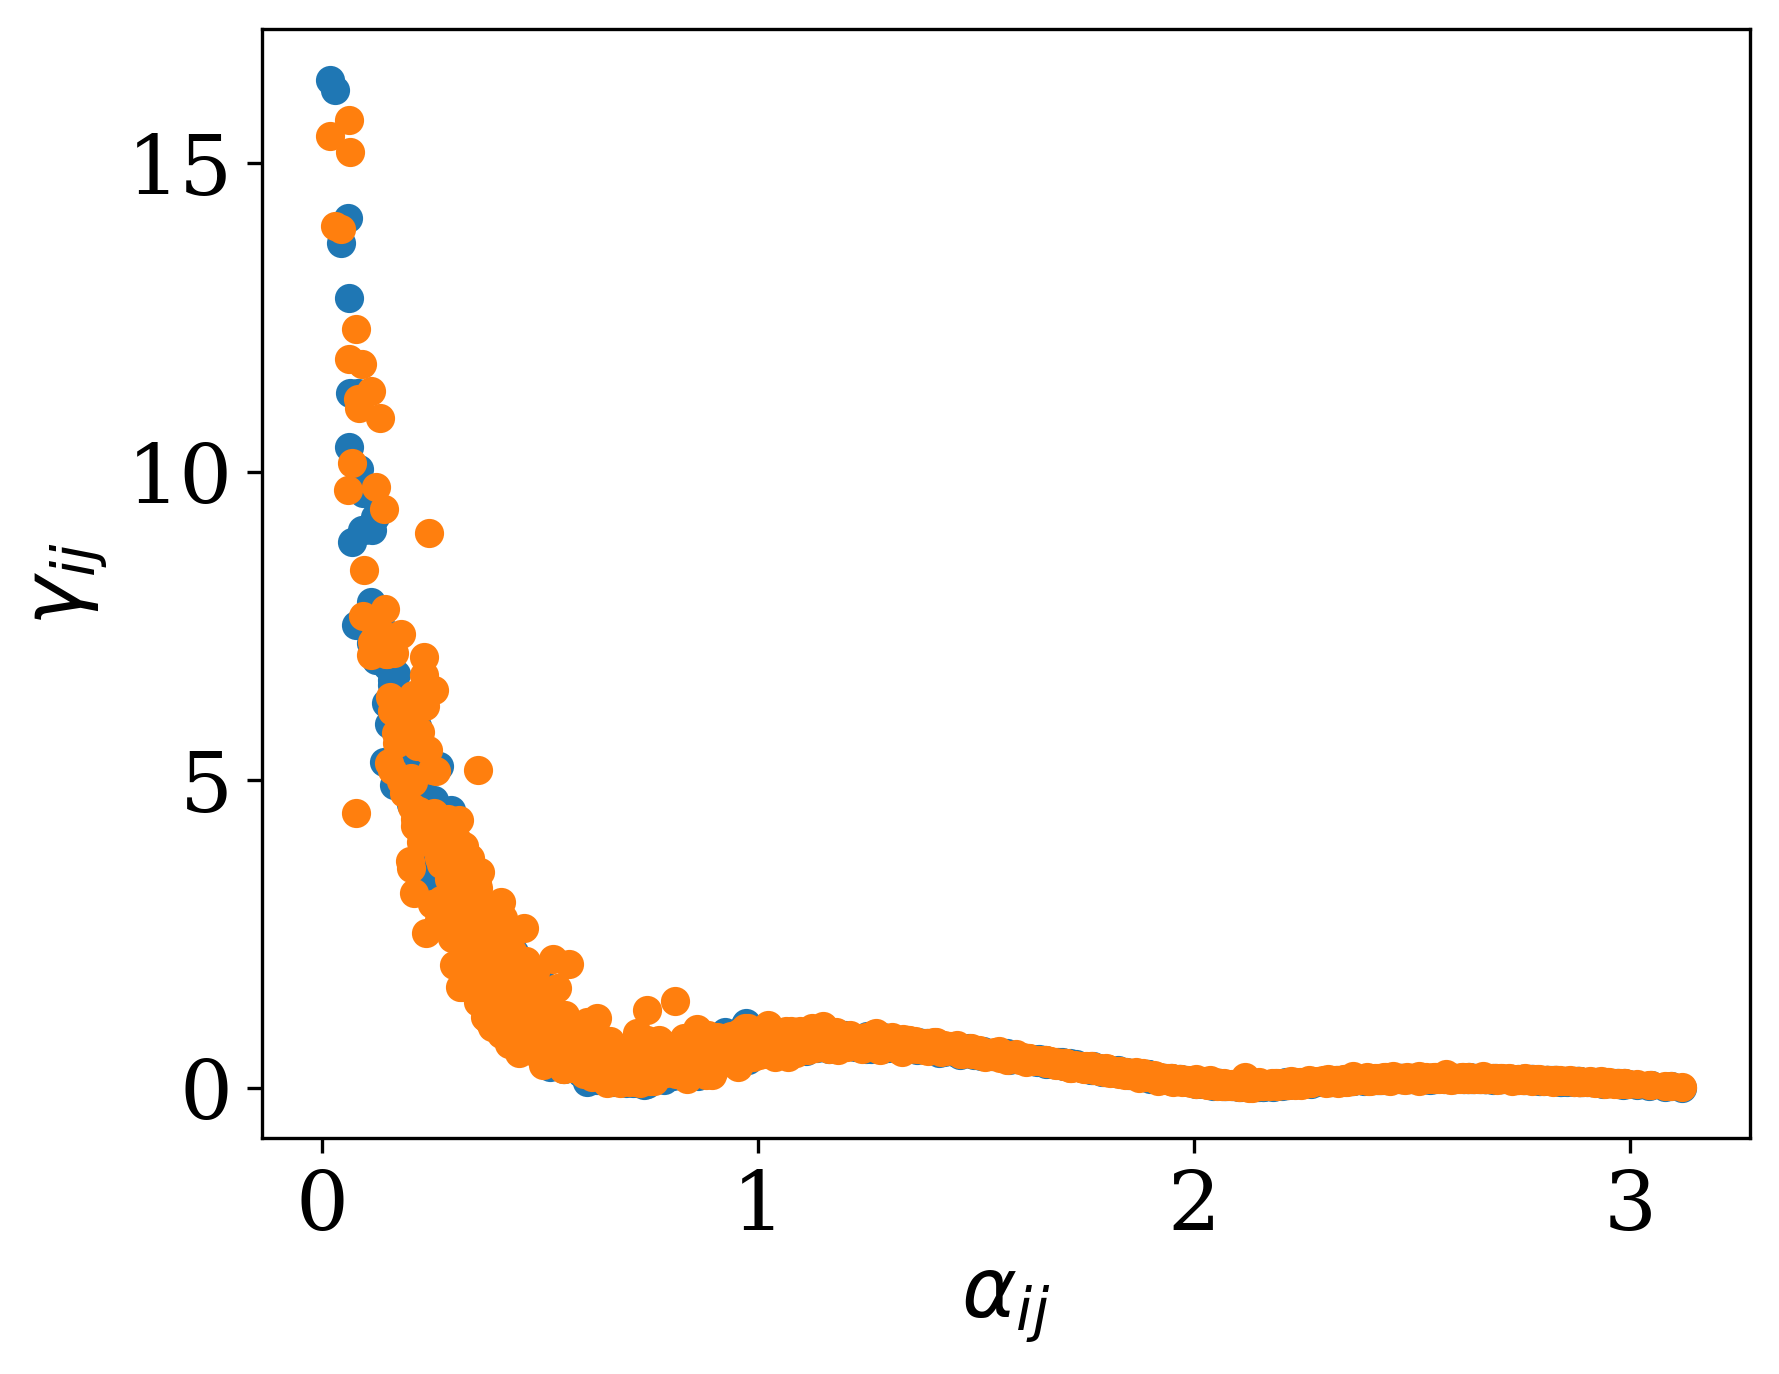

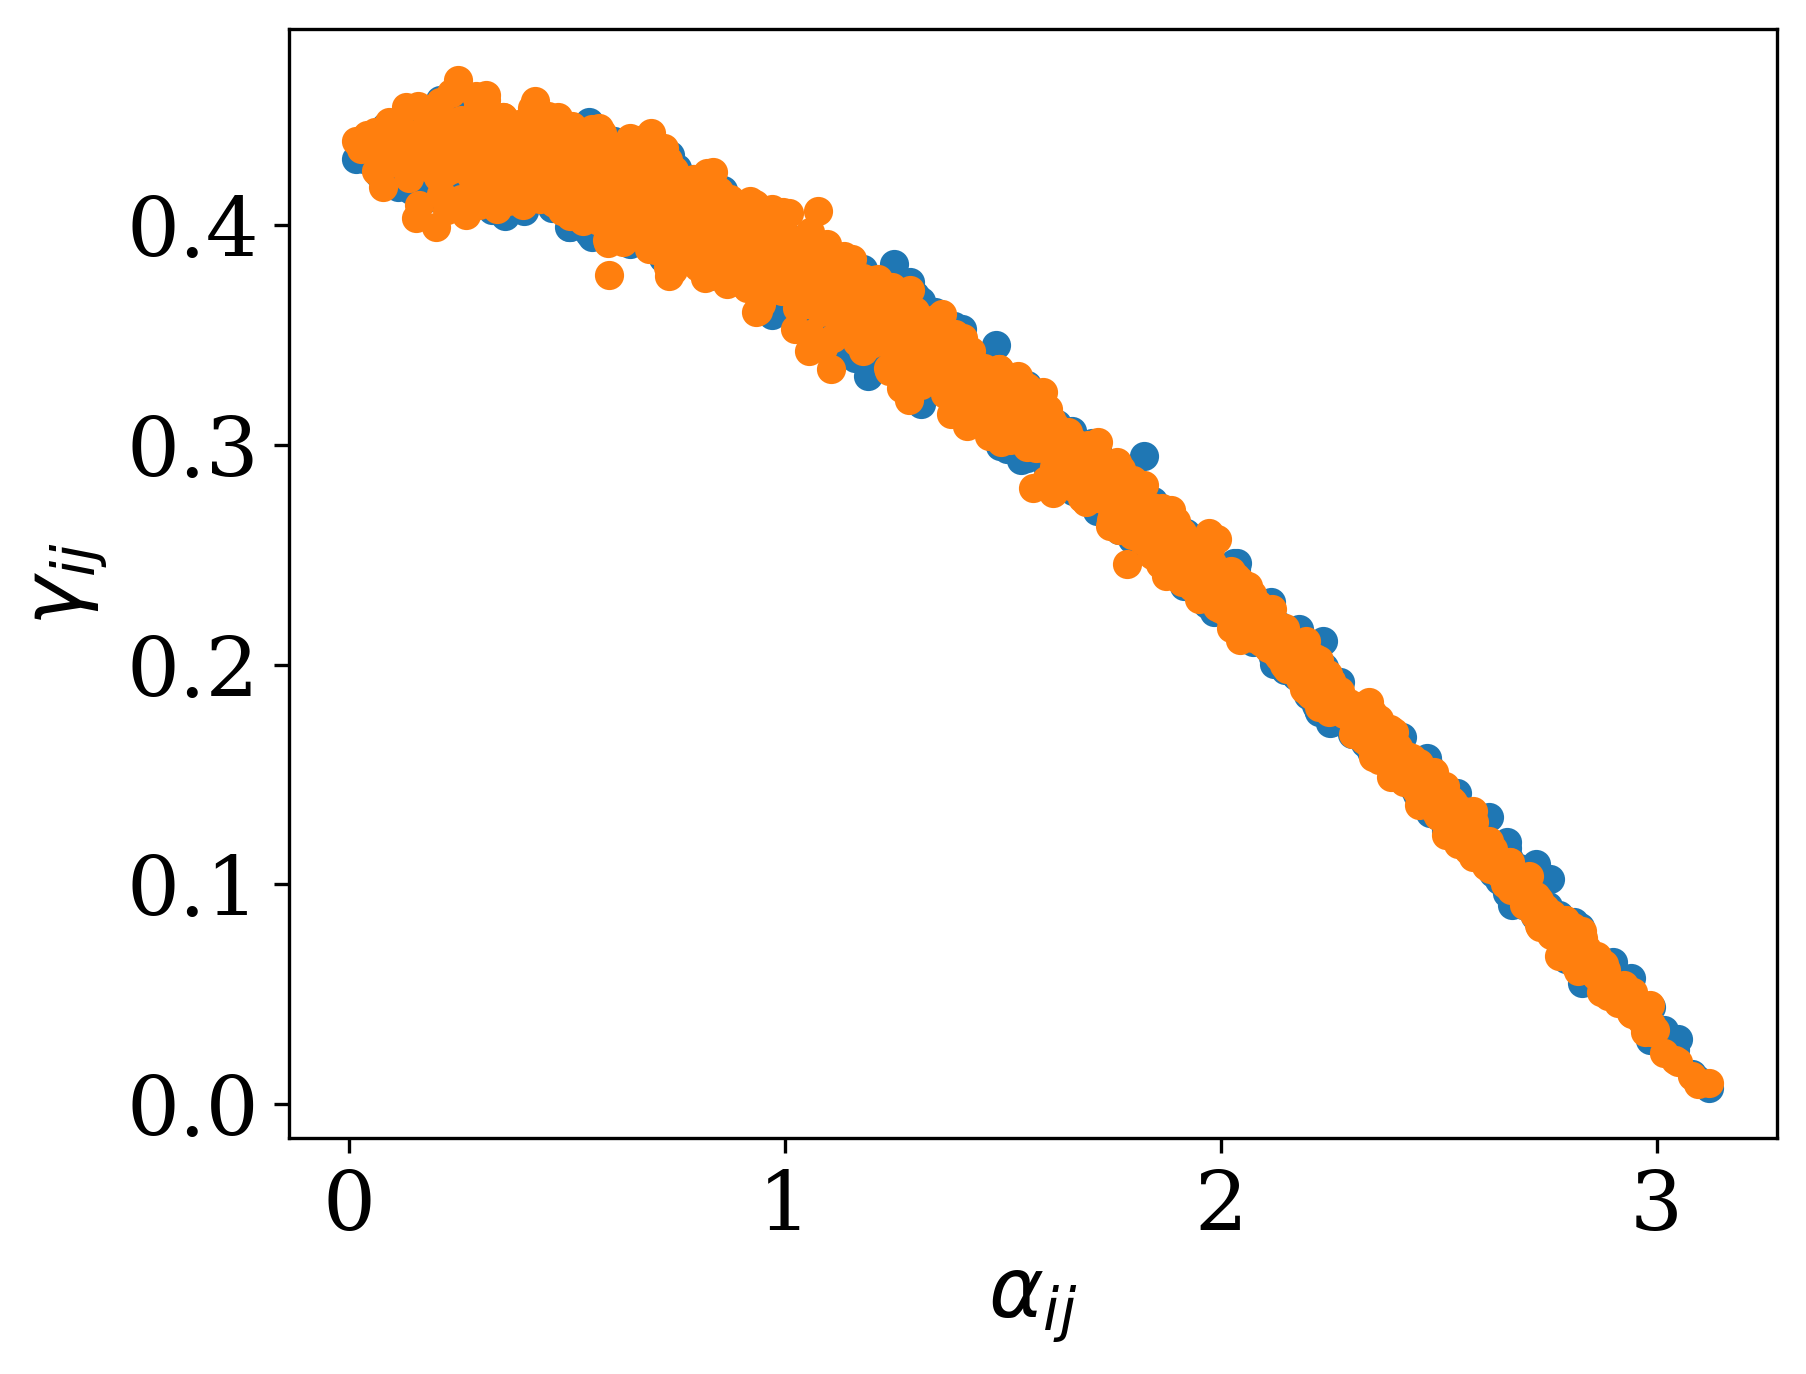

In [ ]:
plt.plot(alpha_ij, gamma1_ij_t[:,0], 'o')
plt.plot(alpha_ij, gamma1_ij_t[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma1_ij_v[:,0], 'o')
plt.plot(alpha_ij, gamma1_ij_v[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma1_ij_s[:,0], 'o')
plt.plot(alpha_ij, gamma1_ij_s[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()

In [ ]:
gamma2_ij_t = []
gamma2_ij_v = []
gamma2_ij_s = []
alpha_ij = []
ell=2
psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma2_ij_t.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], f, 't', psi))
        gamma2_ij_v.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'v', psi))
        gamma2_ij_s.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 's', psi))

gamma2_ij_t = np.array(gamma2_ij_t)
gamma2_ij_v = np.array(gamma2_ij_v)
gamma2_ij_s = np.array(gamma2_ij_s)
alpha_ij = np.array(alpha_ij)


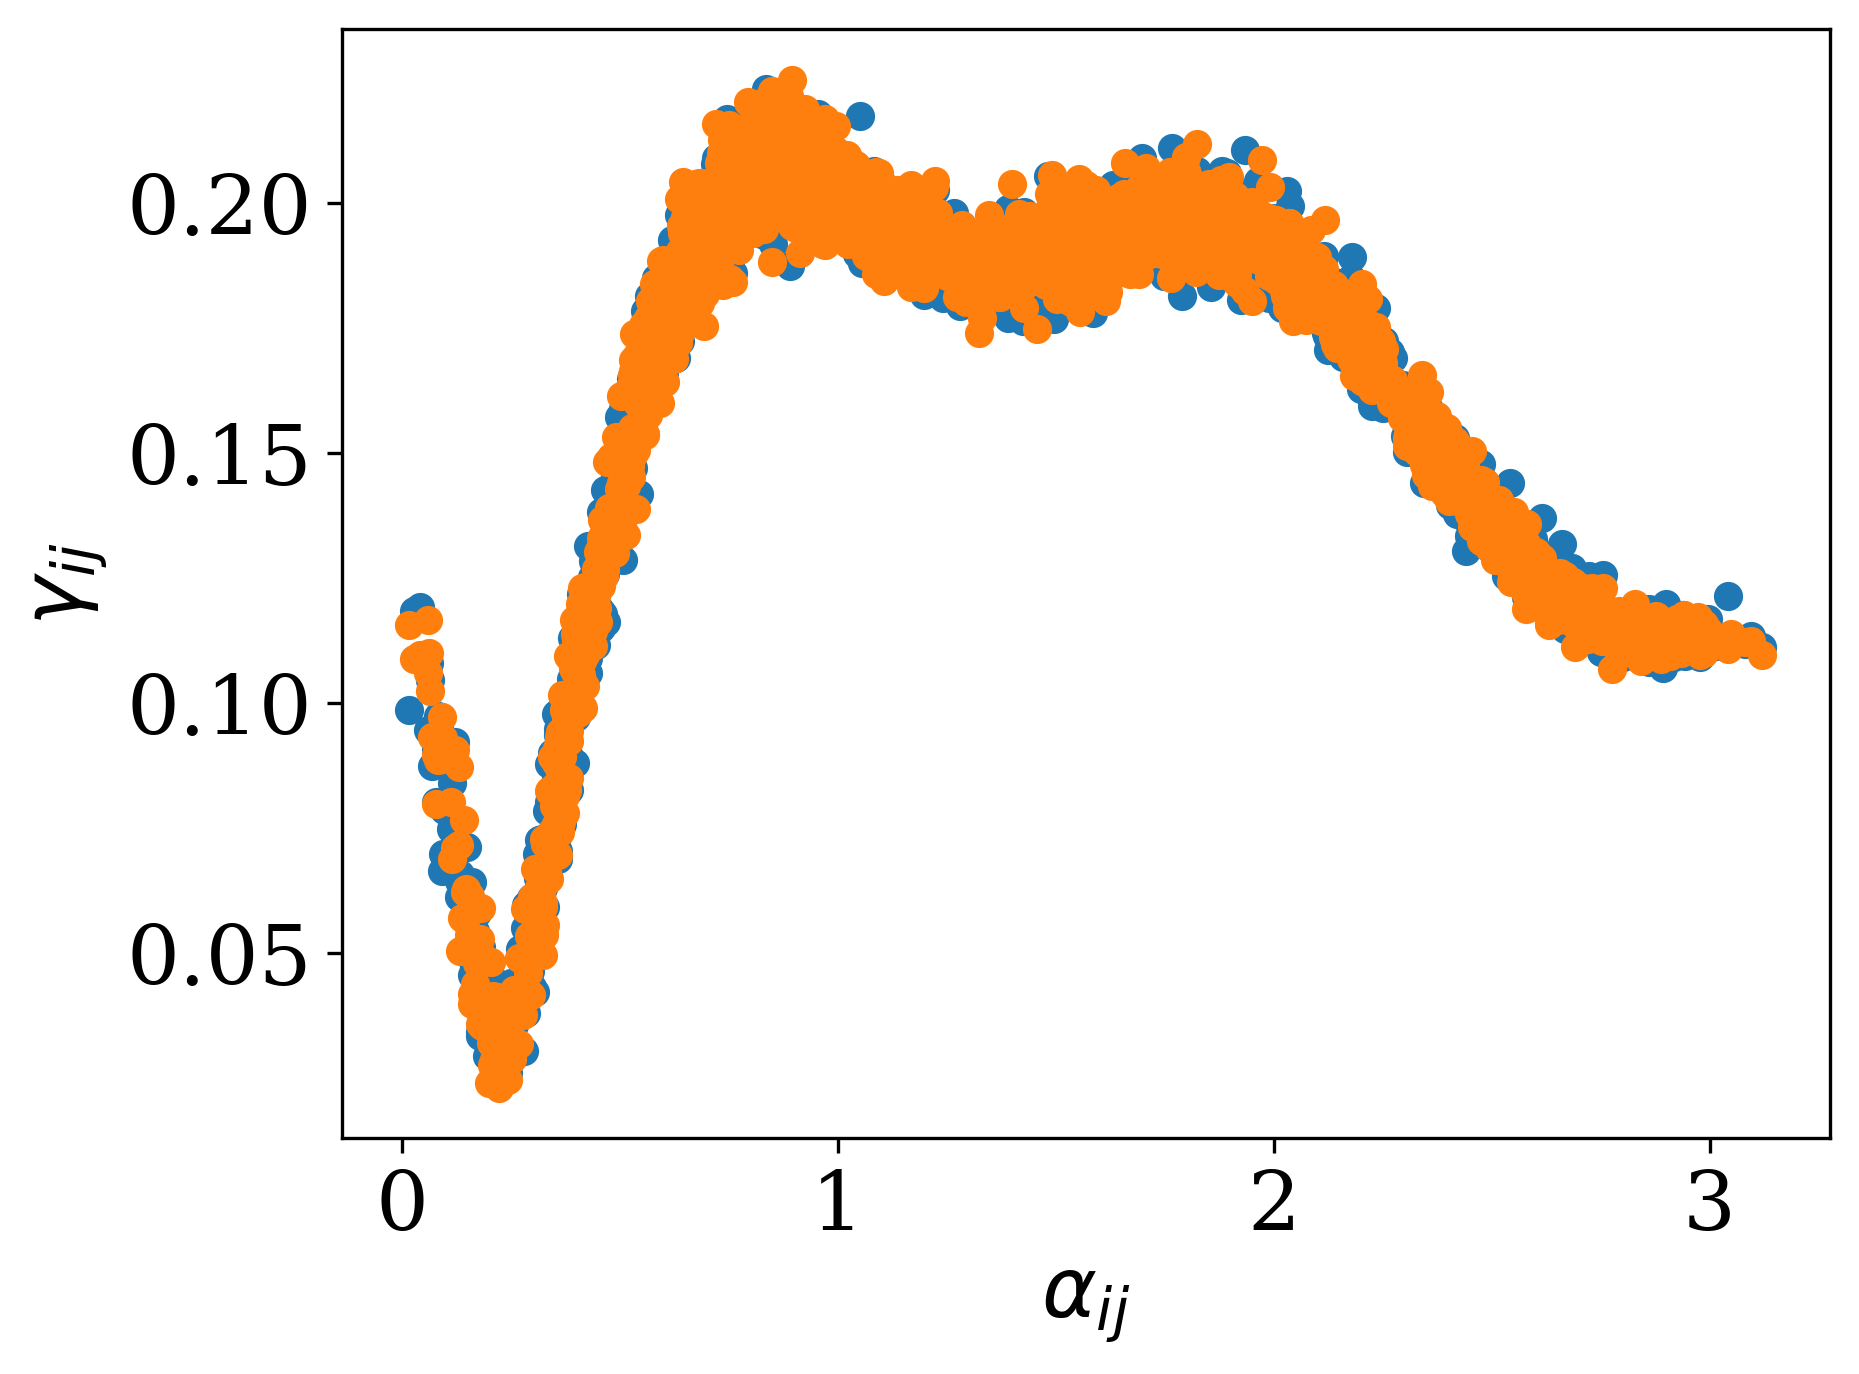

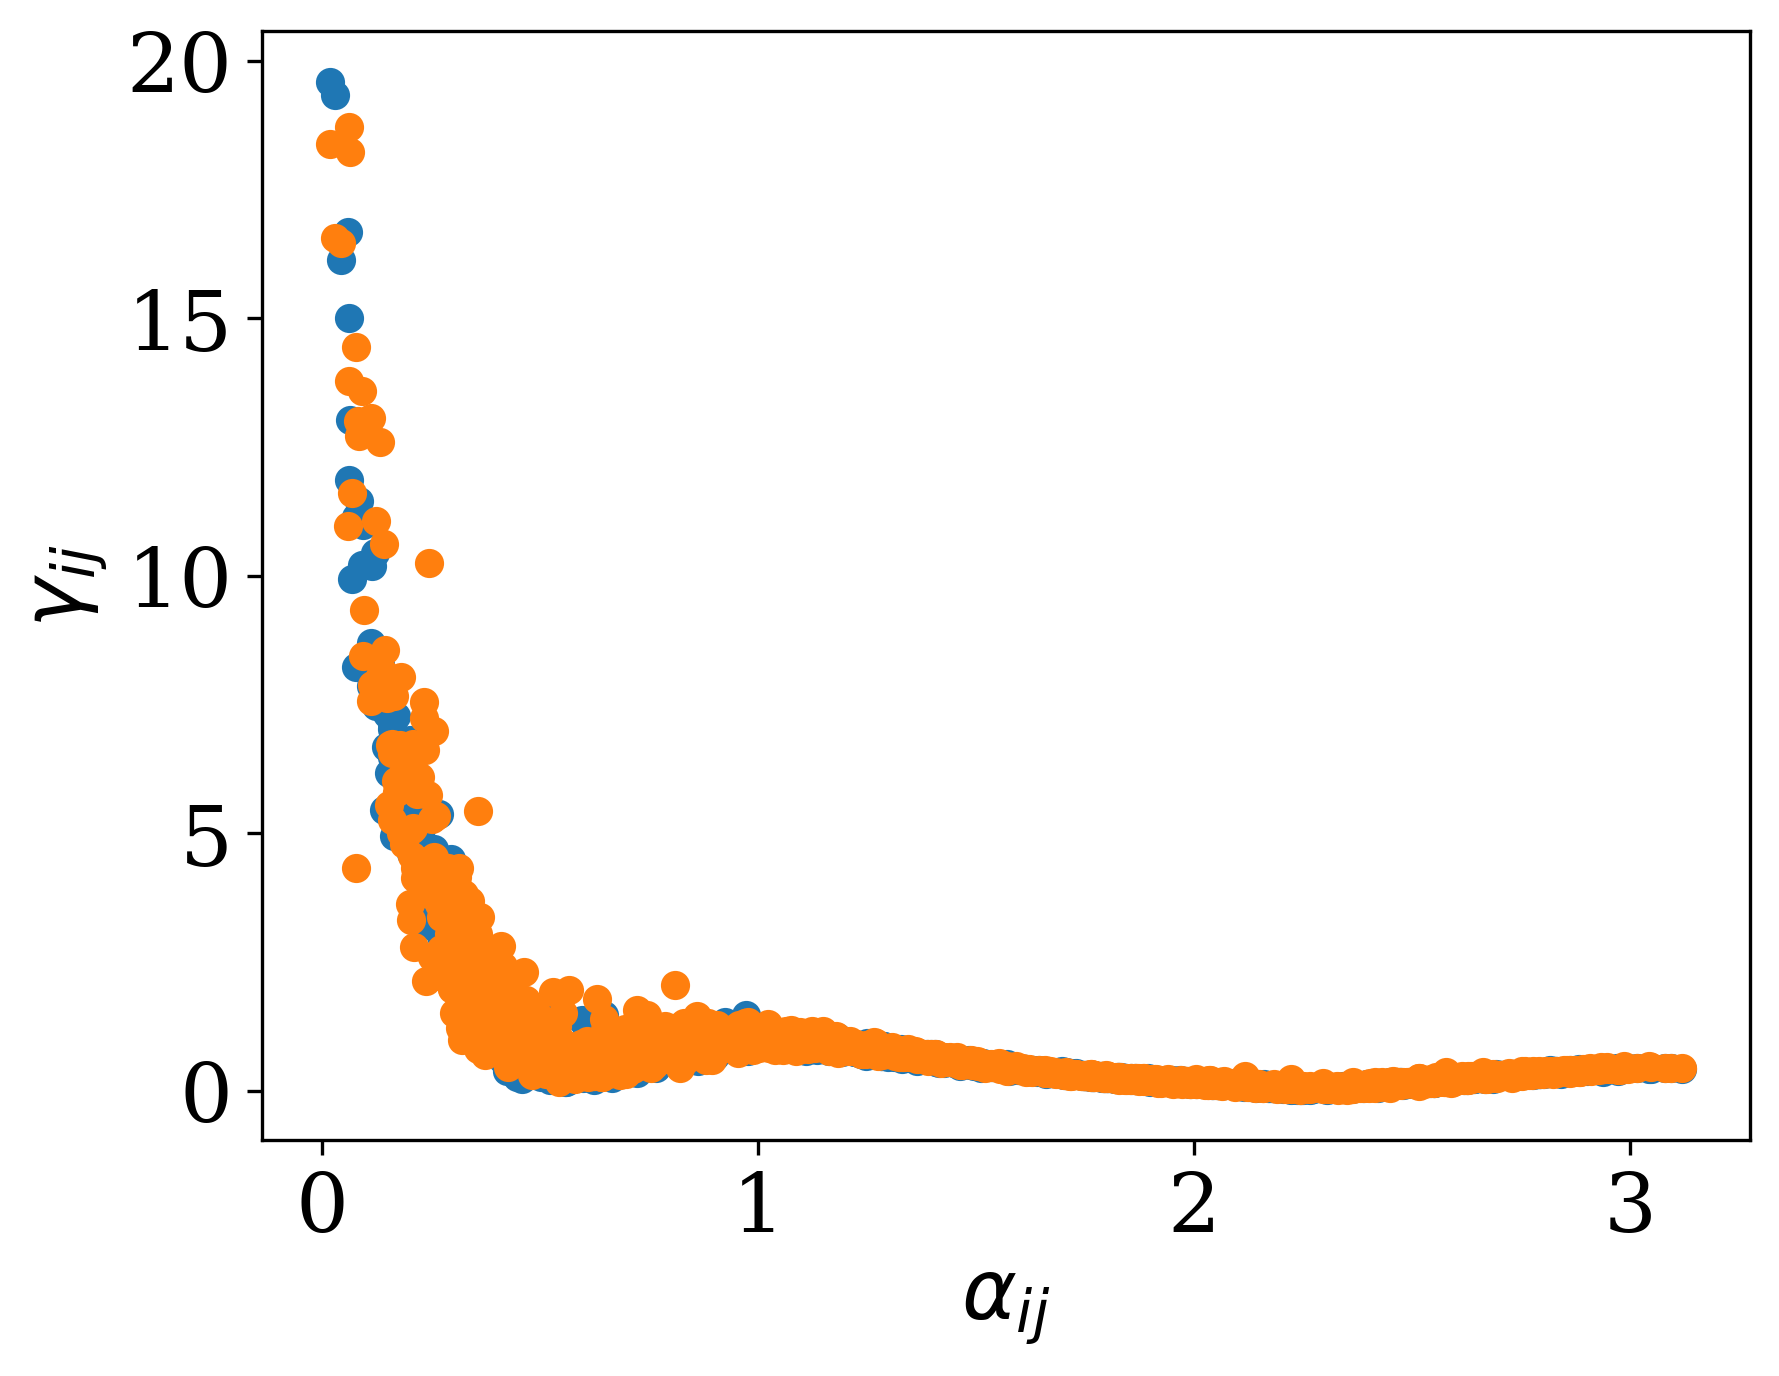

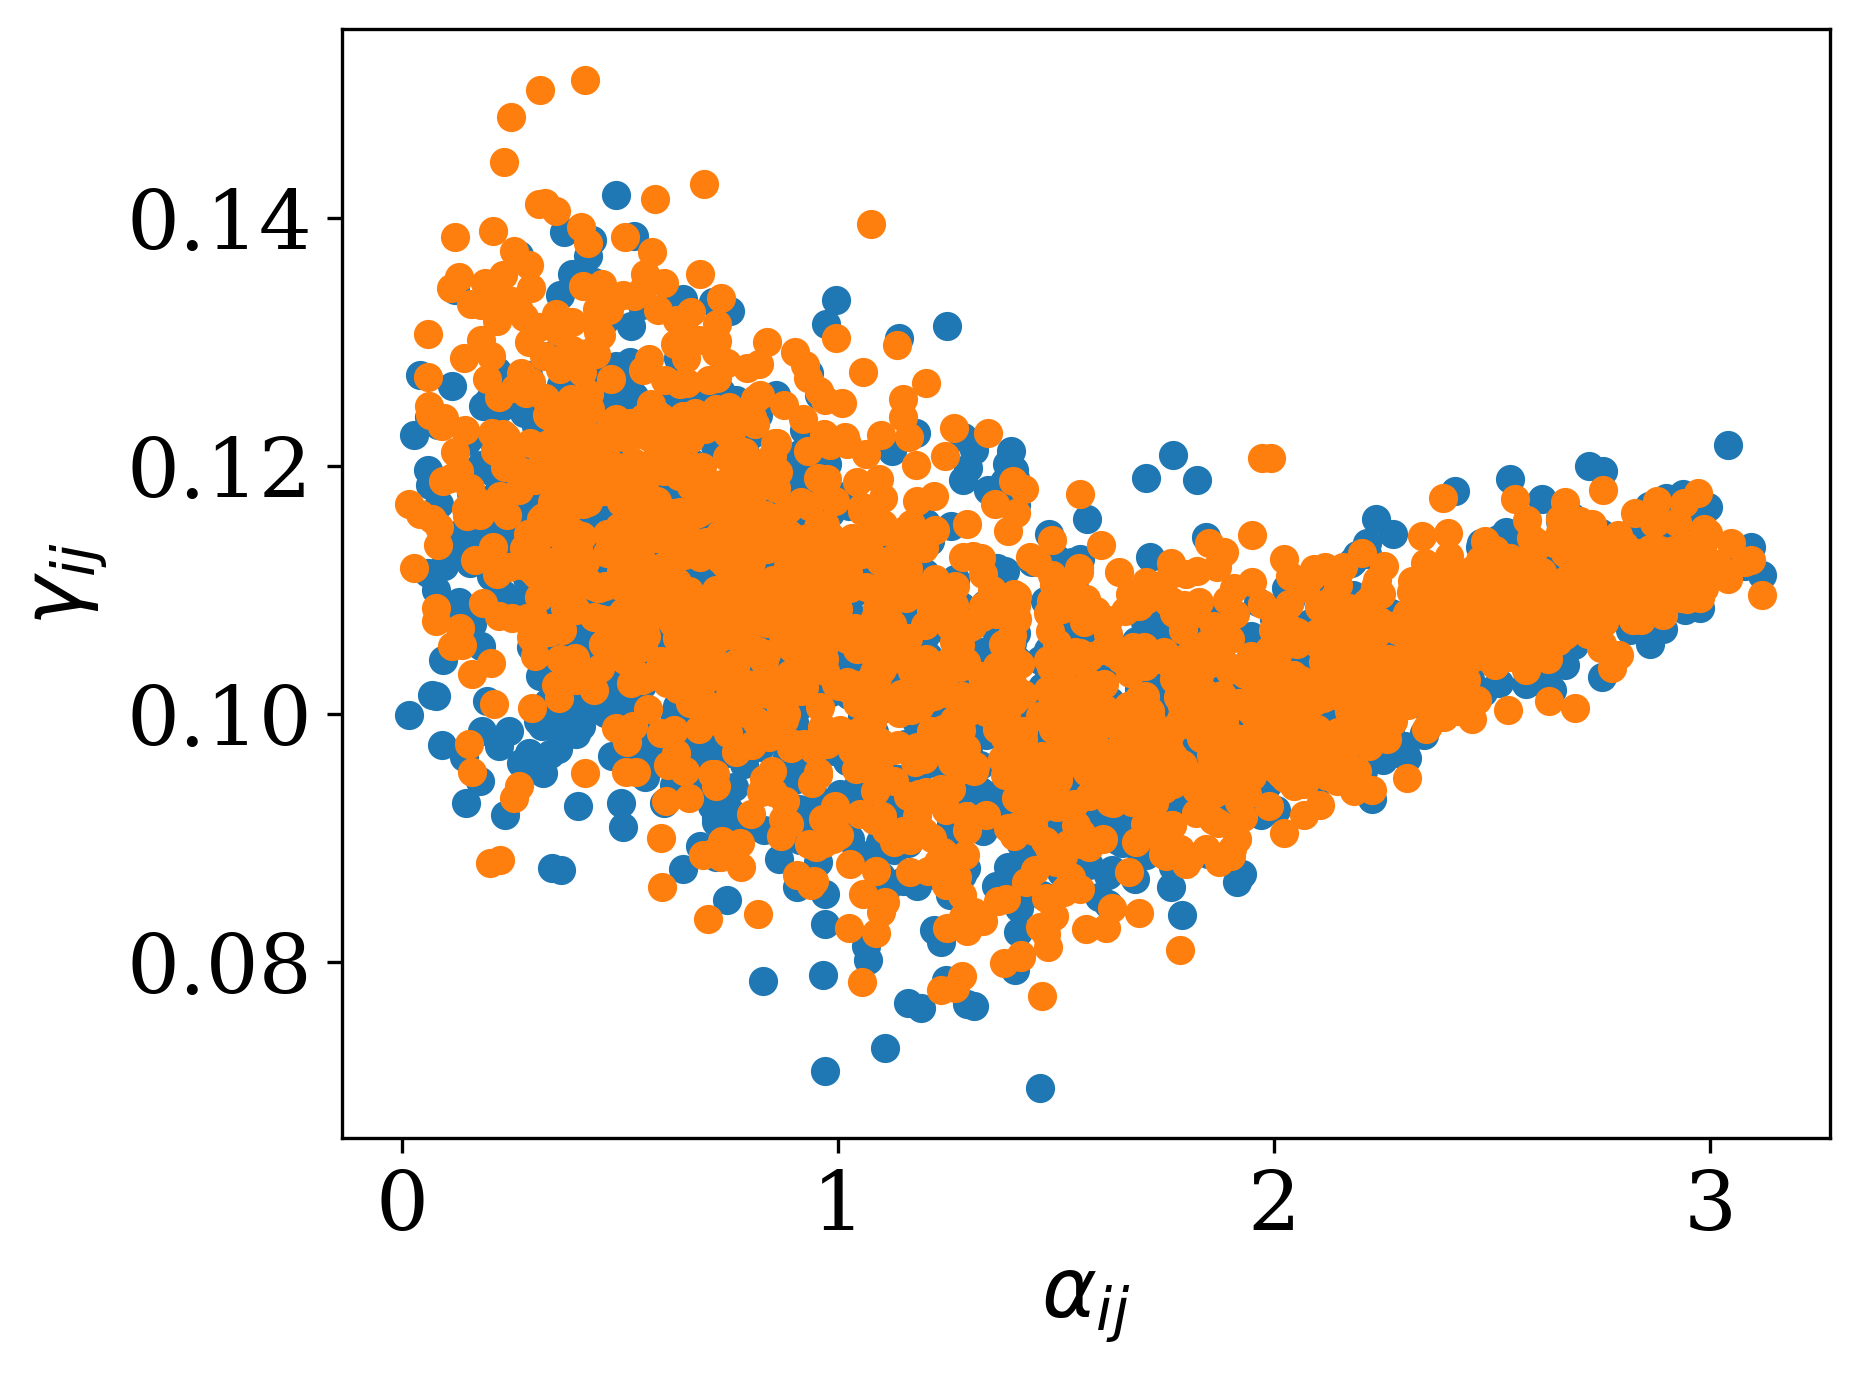

In [ ]:

plt.plot(alpha_ij, gamma2_ij_t[:,0], 'o')
plt.plot(alpha_ij, gamma2_ij_t[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma2_ij_v[:,0], 'o')
plt.plot(alpha_ij, gamma2_ij_v[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma2_ij_s[:,0], 'o')
plt.plot(alpha_ij, gamma2_ij_s[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()

In [ ]:
gamma3_ij_t = []
gamma3_ij_v = []
gamma3_ij_s = []
alpha_ij = []
ell=3
psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma3_ij_t.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 't', psi))
        gamma3_ij_v.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],f, 'v', psi))
        gamma3_ij_s.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],f, 's', psi))



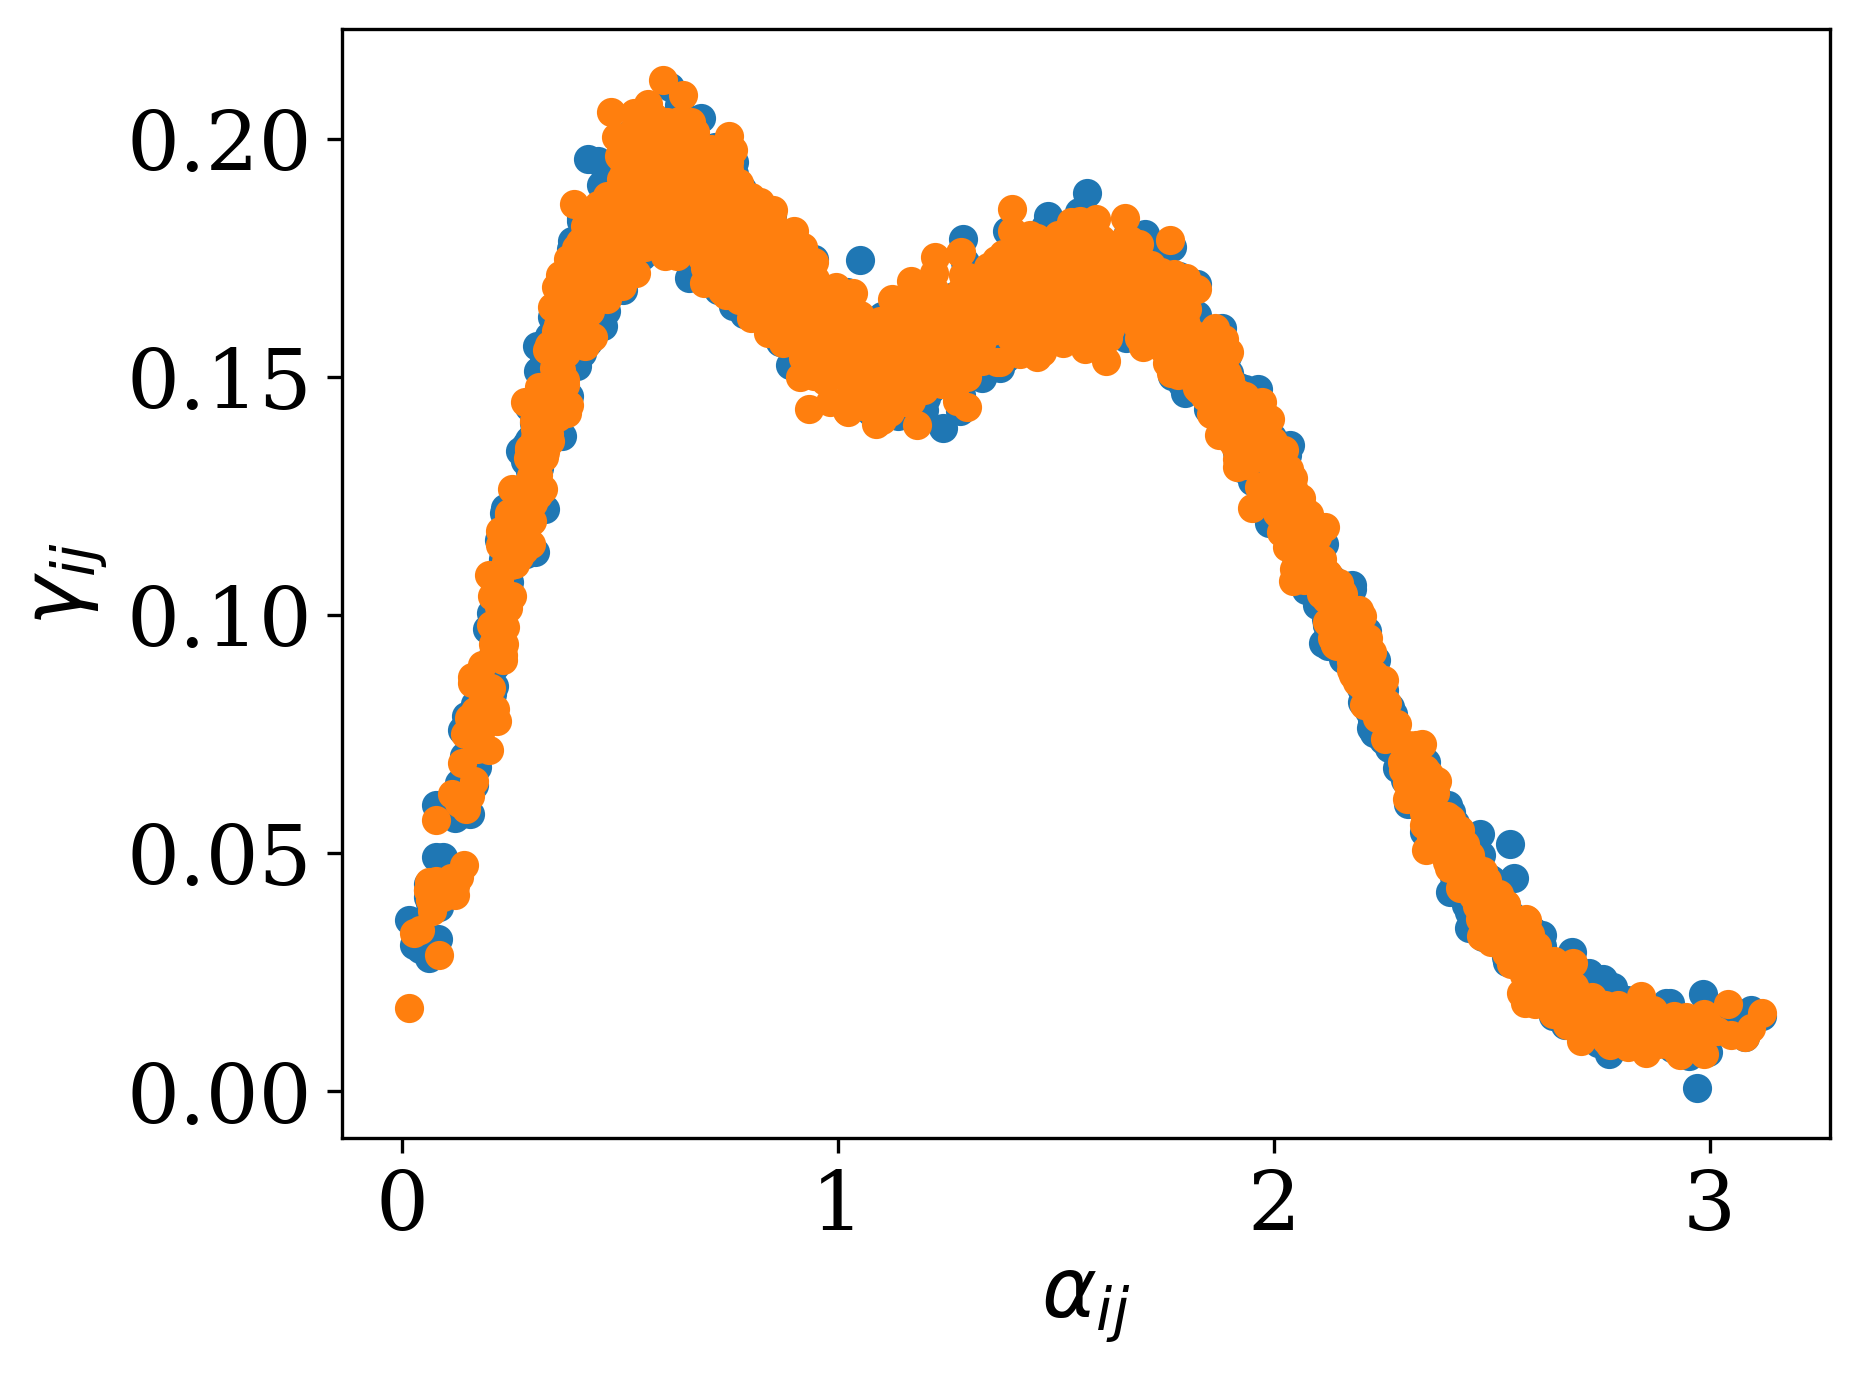

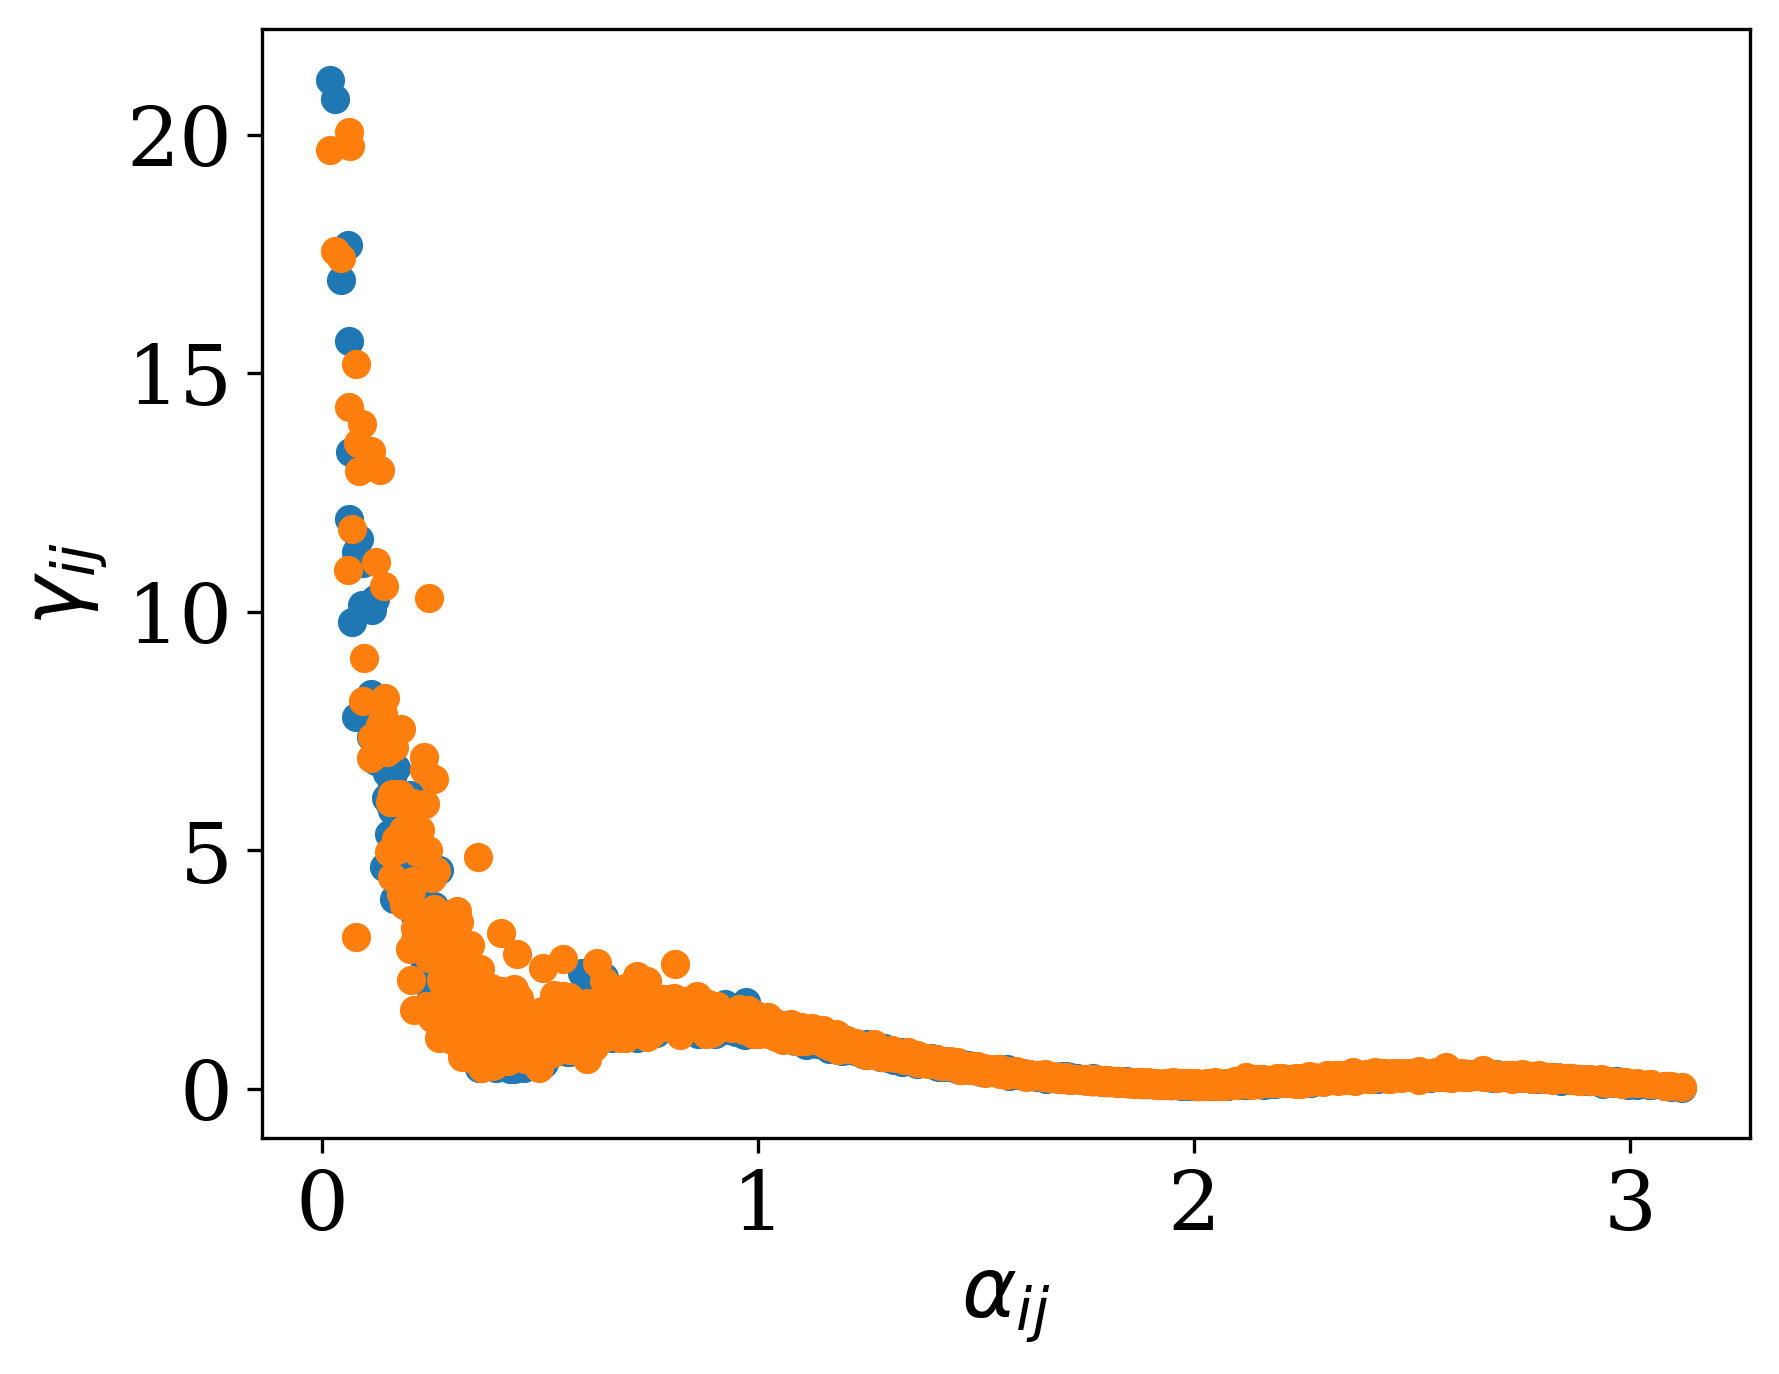

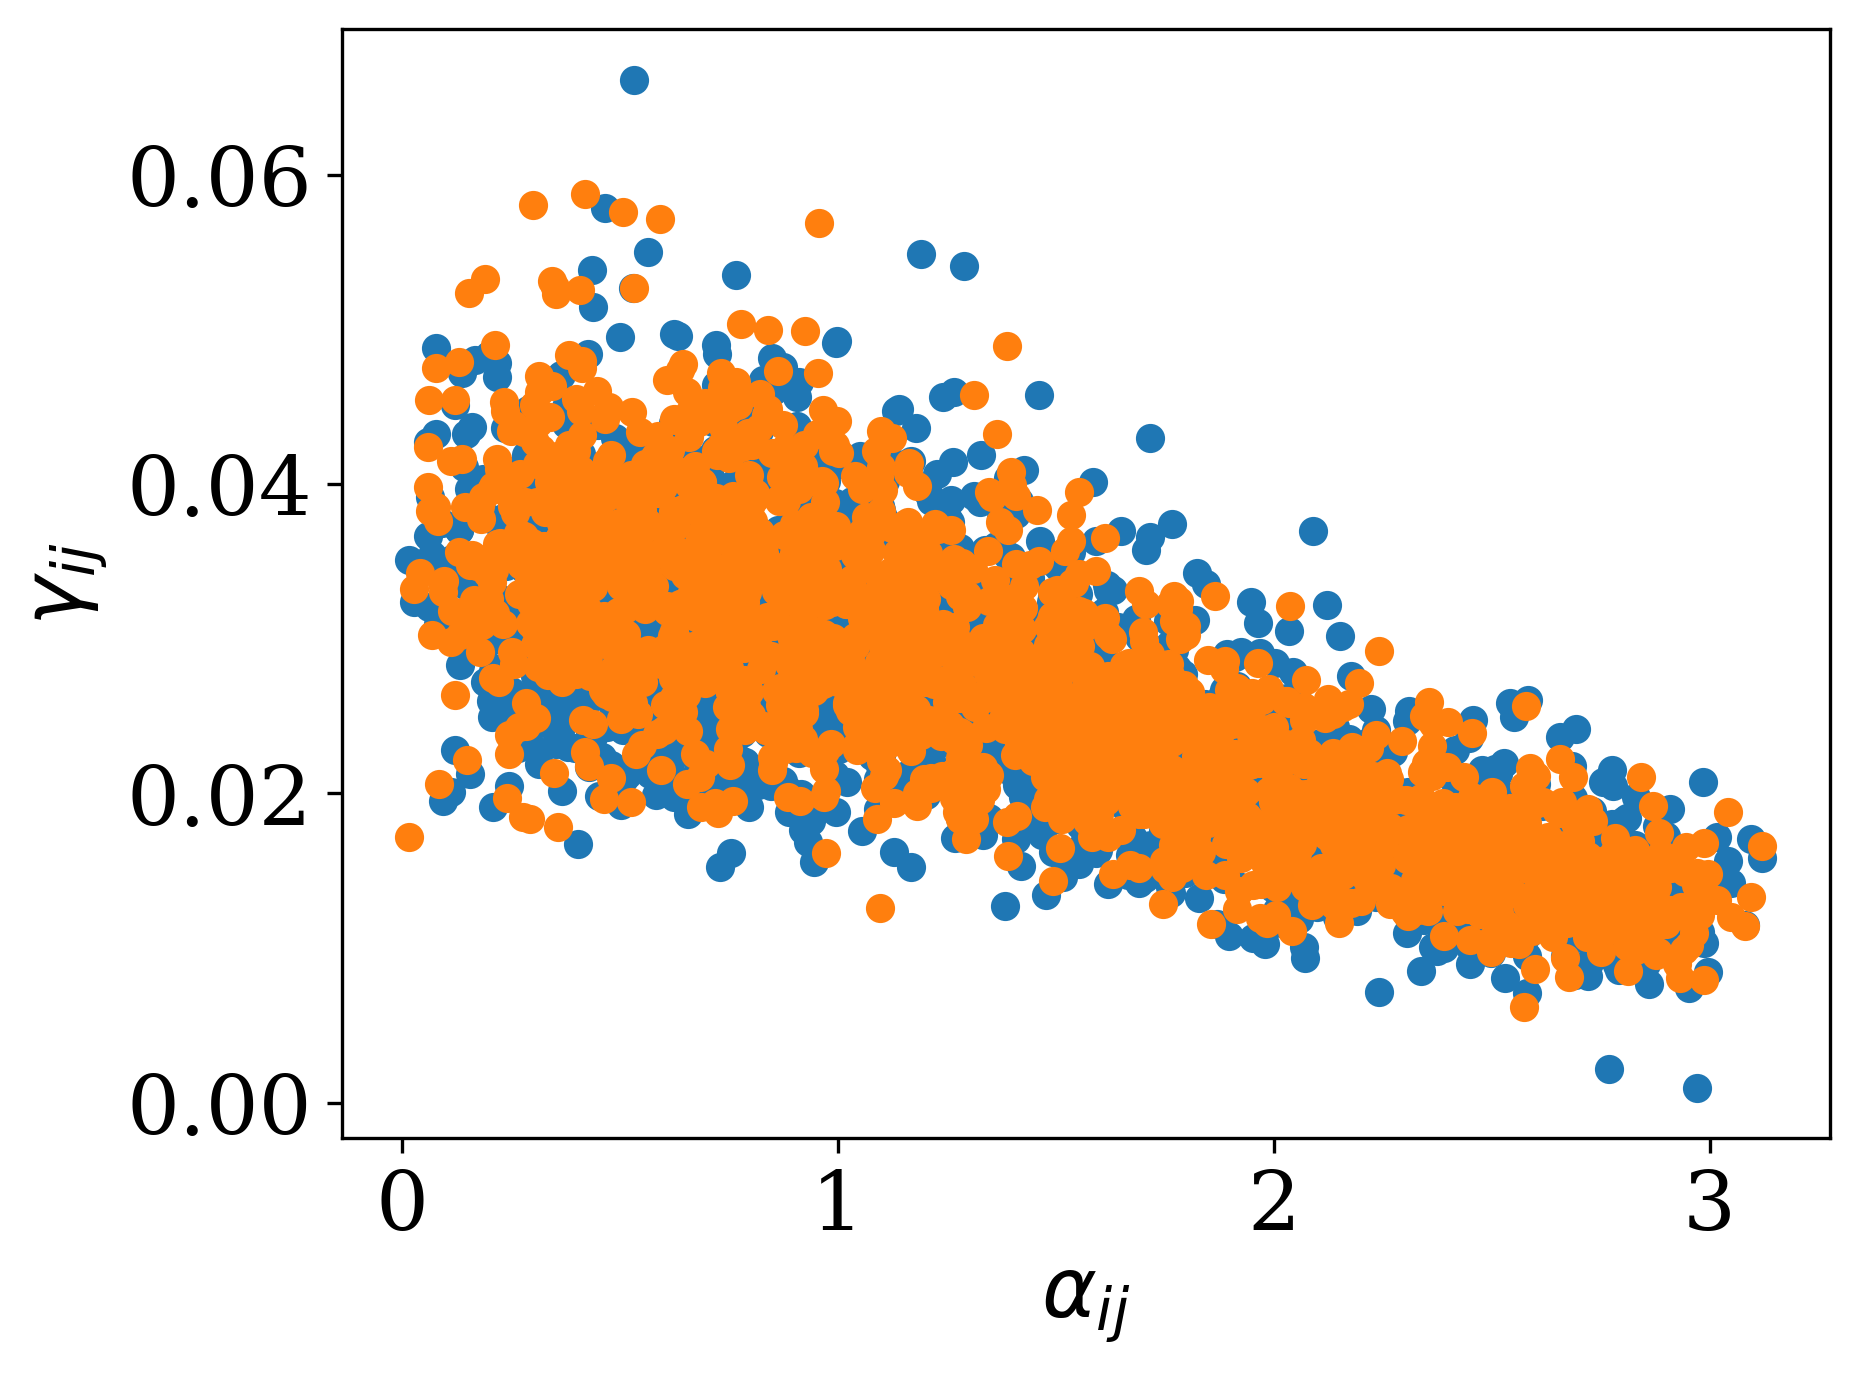

In [ ]:
gamma3_ij_t = np.array(gamma3_ij_t)
gamma3_ij_v = np.array(gamma3_ij_v)
gamma3_ij_s = np.array(gamma3_ij_s)
alpha_ij = np.array(alpha_ij)

plt.plot(alpha_ij, gamma3_ij_t[:,0], 'o')
plt.plot(alpha_ij, gamma3_ij_t[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma3_ij_v[:,0], 'o')
plt.plot(alpha_ij, gamma3_ij_v[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()
plt.plot(alpha_ij, gamma3_ij_s[:,0], 'o')
plt.plot(alpha_ij, gamma3_ij_s[:,-1], 'o')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.show()

In [ ]:
colors = cm.viridis(np.linspace(0, 1, 4))


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

def custom_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi / 5:
        return r'$\frac{\pi}{5}$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 4 * np.pi / 5:
        return r'$\frac{4\pi}{5}$'
    elif x == np.pi:
        return r'$\pi$'
    else:
        return ''



# Definire i tick personalizzati
custom_ticks = [0, np.pi / 5, np.pi / 2, 4 * np.pi / 5, np.pi]

f_index = np.argmin(np.abs(f - 1e-8))
print(f_index)
gamma_ij_t_f_index = gamma_ij_t[:,f_index]
gamma_ij_v_f_index = gamma_ij_v[:,f_index]
gamma_ij_s_f_index = gamma_ij_s[:,f_index]
gamma1_ij_t_f_index = gamma1_ij_t[:,f_index]
gamma1_ij_v_f_index = gamma1_ij_v[:,f_index]
gamma1_ij_s_f_index = gamma1_ij_s[:,f_index]
gamma2_ij_t_f_index = gamma2_ij_t[:,f_index]
gamma2_ij_v_f_index = gamma2_ij_v[:,f_index]
gamma2_ij_s_f_index = gamma2_ij_s[:,f_index]
gamma3_ij_t_f_index = gamma3_ij_t[:,f_index]
gamma3_ij_v_f_index = gamma3_ij_v[:,f_index]
gamma3_ij_s_f_index = gamma3_ij_s[:,f_index]

49


In [ ]:
# https://arxiv.org/pdf/1306.5394

def R_1_1(alpha):
    term1 = -0.5* np.sqrt(np.pi/6)*np.sin(alpha)
    term2 =  3*(1-np.cos(alpha))
    term3 = (1 + 4/(1+np.cos(alpha))*np.log(np.sin(alpha/2)))
    return term1 * (1+term2*term3)


def R_11(alpha):
    return  -R_1_1(alpha) 


def R_10(alpha):
    term1 =-0.5 *np.sqrt(np.pi/3)
    term2 = 1+ np.cos(alpha)
    term3= 3 * (1-np.cos(alpha))
    term4 = 4*np.log(np.sin(alpha/2))
    return term1 * (term2 + term3 * (term2 + term4))

def R_1(alpha):
    term1 = R_1_1(alpha)
    term2 = R_11(alpha)
    term3 = R_10(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2)

def R_22(alpha):
    term1 = -0.25 * np.sqrt(5*np.pi/6) * (1-np.cos(alpha))/(1+ cos(alpha))
    term2 = (1+ np.cos(alpha)) *((np.cos(alpha))**2 + 4* np.cos(alpha)-9)
    term3 = -24 * (1-cos(alpha)) * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)  

def R_21(alpha):
    term1 = 0.25*np.sqrt(2*np.pi/15)*np.sin(alpha)
    term2 = 5*(np.cos(alpha)**2) + 15*np.cos(alpha) -21
    term3 = -60*(1-np.cos(alpha))/(1+np.cos(alpha))*np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def R_20(alpha):
    term1 = np.sqrt(np.pi/5)/3
    term2 = np.cos(alpha) 
    term3 = 15*(1-np.cos(alpha))/4
    term4 = (1+np.cos(alpha))*(np.cos(alpha)+3) + 8*np.log(np.sin(alpha/2))
    return term1*(term2 + term3*term4)

def R_2_2(alpha):
    return - R_22(alpha)

def R_2_1(alpha):
    return - R_21(alpha)

def R_2(alpha):
    term1 = R_2_2(alpha)
    term2 = R_2_1(alpha)
    term3 = R_20(alpha)
    term4 = R_21(alpha)
    term5 = R_22(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2)

alpha = np.linspace(0, np.pi, 100)

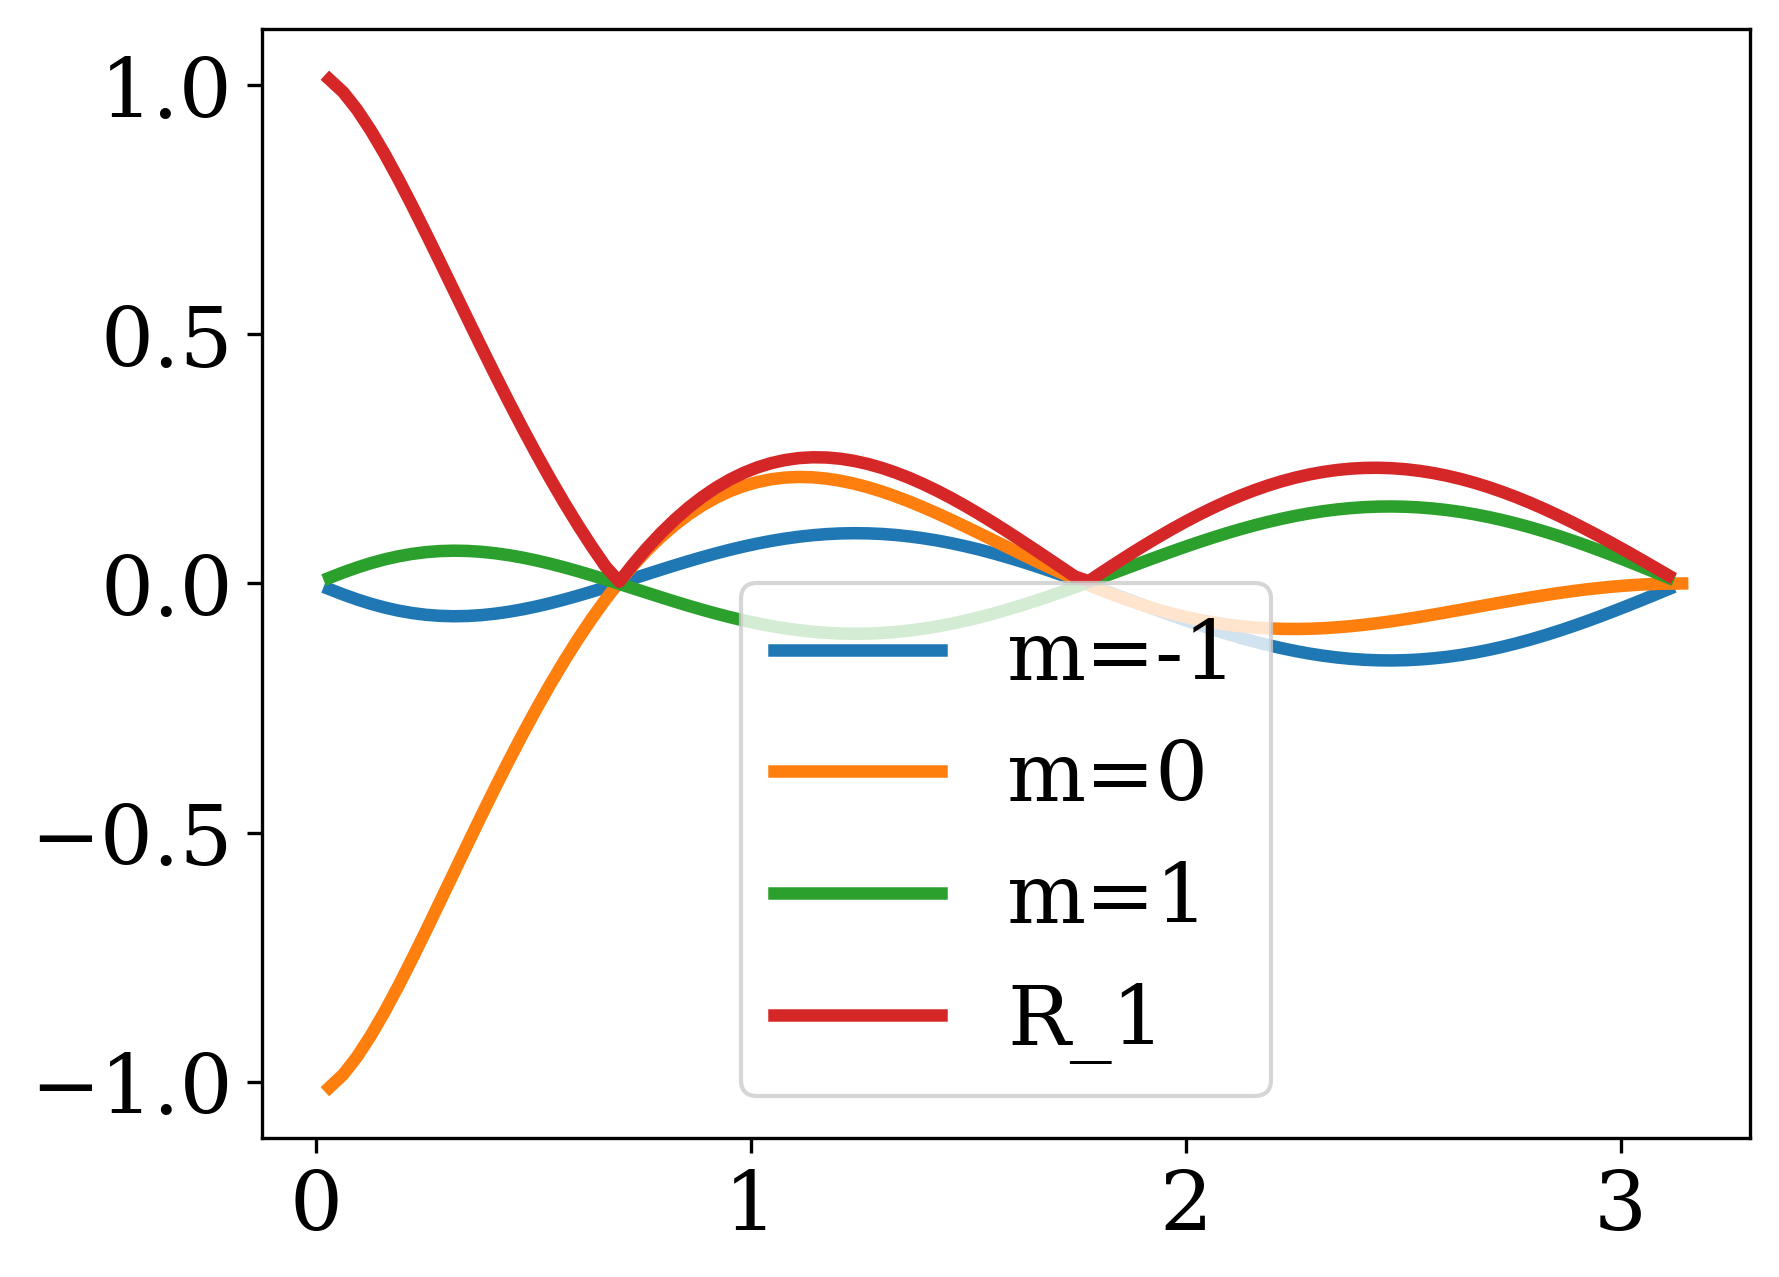

In [ ]:
# R_1 components

alpha= np.linspace(0, np.pi, 100)

plt.plot(alpha,R_1_1(alpha), label='m=-1' )
plt.plot(alpha, R_10(alpha), label='m=0')
plt.plot(alpha, R_11(alpha), label='m=1')
plt.plot(alpha, R_1(alpha), label='R_1')
plt.legend()

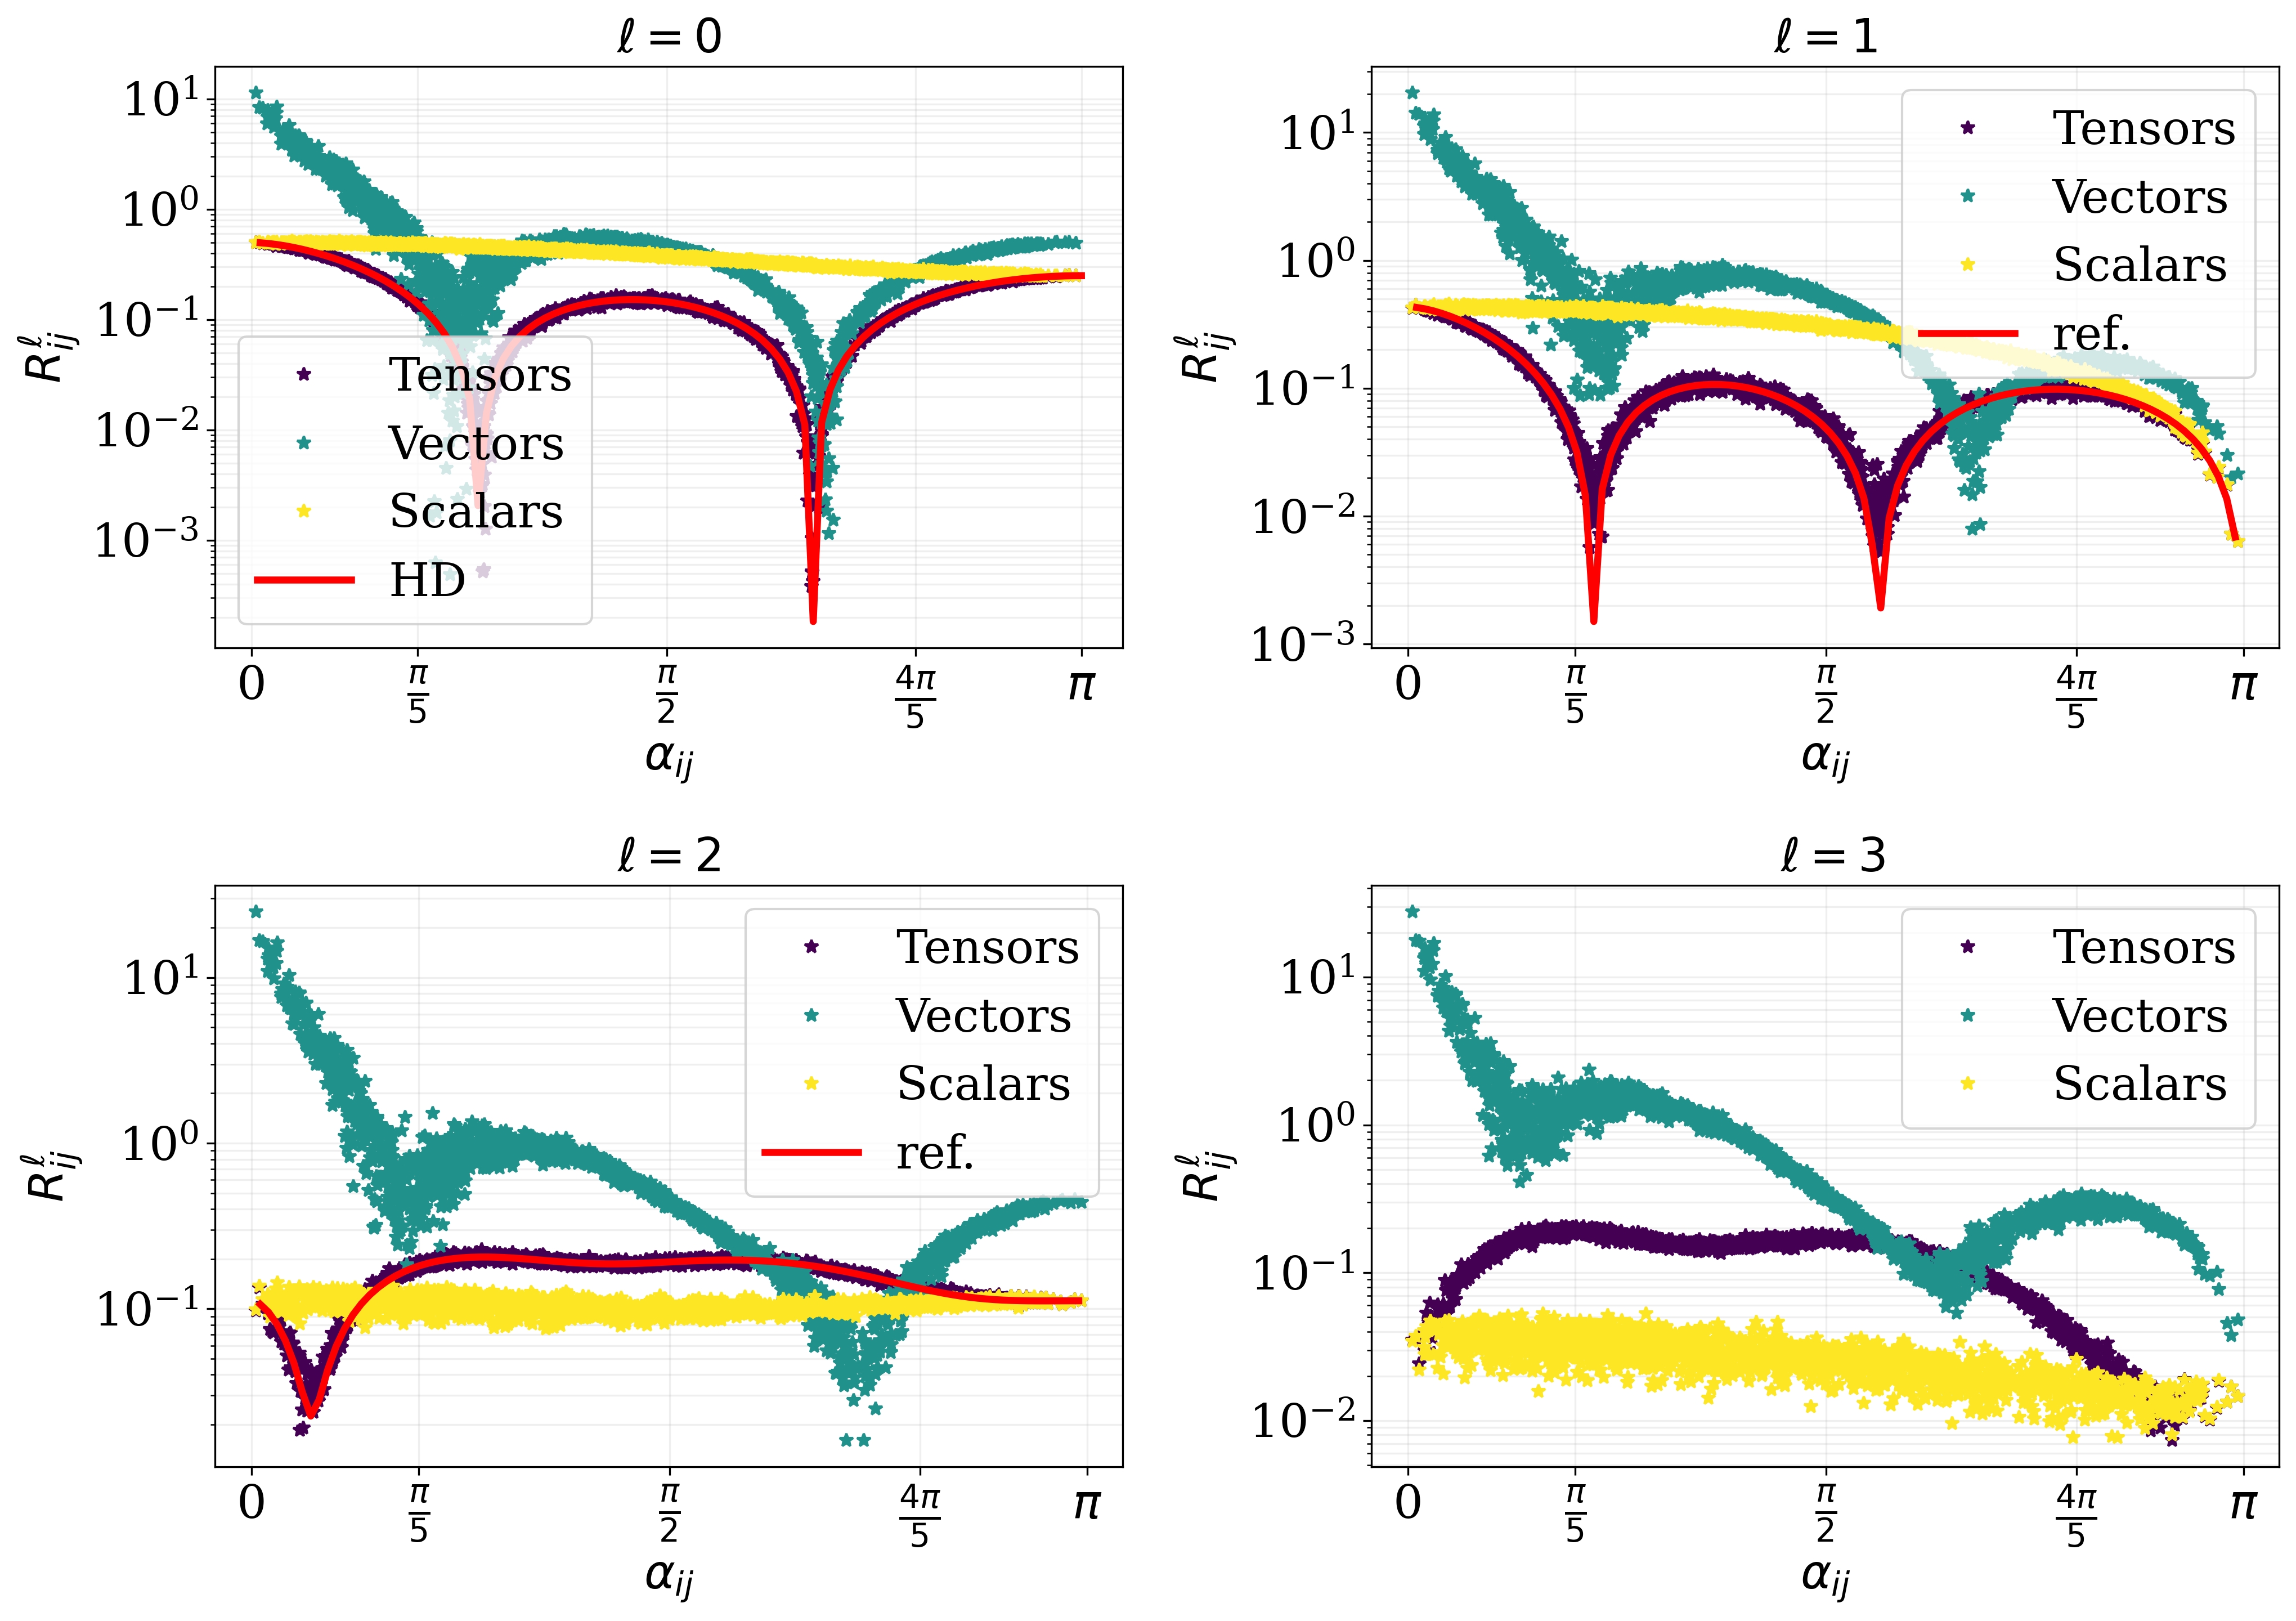

In [ ]:
# Funzione per formattare i tick in multipli di π
def custom_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi / 5:
        return r'$\frac{\pi}{5}$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 4 * np.pi / 5:
        return r'$\frac{4\pi}{5}$'
    elif x == np.pi:
        return r'$\pi$'
    else:
        return ''

# Generare una palette di colori con Viridis
colors = cm.viridis(np.linspace(0, 1, 3))  # 3 colori per Tensors, Vectors, Scalars

# Creazione della figura con 2x2 subplot
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Definizione dei tick personalizzati
custom_ticks = [0, np.pi / 5, np.pi / 2, 4 * np.pi / 5, np.pi]

# Plot per ℓ=0
ax[0, 0].semilogy(alpha_ij, np.abs(gamma_ij_t_f_index), '*', color=colors[0], label='Tensors')
ax[0, 0].semilogy(alpha_ij, np.abs(gamma_ij_v_f_index), '*', color=colors[1], label='Vectors')
ax[0, 0].semilogy(alpha_ij, np.abs(gamma_ij_s_f_index), '*', color=colors[2], label='Scalars')
ax[0, 0].semilogy(alpha, np.abs(hellings_downs(alpha)), color='red', label='HD')
ax[0, 0].set_xlabel(r'$\alpha_{ij}$')
ax[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
ax[0, 0].grid(which='both', alpha=0.2)
ax[0, 0].set_title(r'$\ell=0$')
ax[0, 0].set_xticks(custom_ticks)
ax[0, 0].legend()
ax[0, 0].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=1
ax[0, 1].semilogy(alpha_ij, gamma1_ij_t_f_index, '*', color=colors[0], label='Tensors')
ax[0, 1].semilogy(alpha_ij, gamma1_ij_v_f_index, '*', color=colors[1], label='Vectors')
ax[0, 1].semilogy(alpha_ij, gamma1_ij_s_f_index, '*', color=colors[2], label='Scalars')
ax[0, 1].semilogy(alpha, 3*np.sqrt(4*np.pi)/(8*np.pi)* R_1(alpha), color='red', label='ref.')
ax[0, 1].set_xlabel(r'$\alpha_{ij}$')
ax[0, 1].set_ylabel(r'$R_{ij}^{\ell}$')
ax[0, 1].grid(which='both', alpha=0.2)
ax[0, 1].set_title(r'$\ell=1$')
ax[0, 1].set_xticks(custom_ticks)
ax[0, 1].legend()
ax[0, 1].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=2
ax[1, 0].semilogy(alpha_ij, gamma2_ij_t_f_index, '*', color=colors[0], label='Tensors')
ax[1, 0].semilogy(alpha_ij, gamma2_ij_v_f_index, '*', color=colors[1], label='Vectors')
ax[1, 0].semilogy(alpha_ij, gamma2_ij_s_f_index, '*', color=colors[2], label='Scalars')
ax[1, 0].semilogy(alpha, 3*np.sqrt(4*np.pi)/(8*np.pi)*R_2(alpha), color='red', label='ref.')
ax[1, 0].set_xlabel(r'$\alpha_{ij}$')
ax[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
ax[1, 0].grid(which='both', alpha=0.2)
ax[1, 0].set_title(r'$\ell=2$')
ax[1, 0].set_xticks(custom_ticks)
ax[1, 0].legend()
ax[1, 0].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=3
ax[1, 1].semilogy(alpha_ij, gamma3_ij_t_f_index, '*', color=colors[0], label='Tensors')
ax[1, 1].semilogy(alpha_ij, gamma3_ij_v_f_index, '*', color=colors[1], label='Vectors')
ax[1, 1].semilogy(alpha_ij, gamma3_ij_s_f_index, '*', color=colors[2], label='Scalars')
ax[1, 1].set_xlabel(r'$\alpha_{ij}$')
ax[1, 1].set_ylabel(r'$R_{ij}^{\ell}$')
ax[1, 1].grid(which='both', alpha=0.2)
ax[1, 1].set_title(r' $\ell=3$')
ax[1, 1].set_xticks(custom_ticks)
ax[1, 1].legend()
ax[1, 1].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

plt.tight_layout()
plt.show()

# Sensitivity Curves

In [ ]:
psi = 0
Tobs_PTA = 15
snr_ = 1

f_PTA = np.logspace(-9, -7, 100)
colors = cm.viridis(np.linspace(0, 1, 3))
pls_NANOGrav_t = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 't', psi)
pls_NANOGrav_v = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 'v', psi)
pls_NANOGrav_s = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 's', psi)
pls_NANOGrav_s = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 'V', psi)



2025-04-15 17:44:05.816 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-15 17:45:21.331 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-15 17:46:37.910 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-15 17:47:54.463 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates


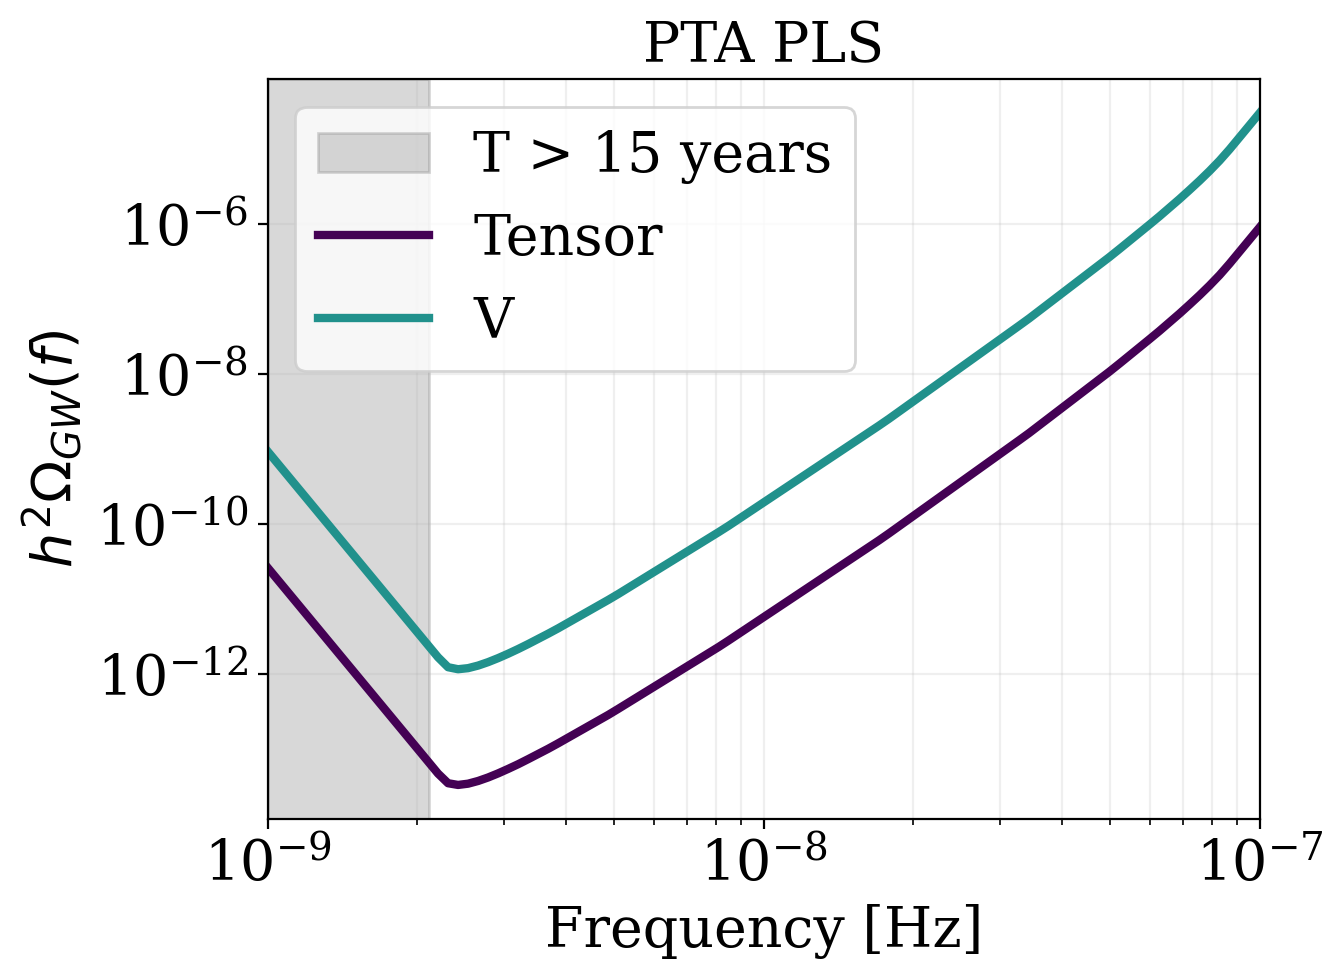

In [ ]:
T_15_years = 15 * 365 * 24 * 3600  # in secondi
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')

plt.plot(f_PTA, pls_NANOGrav_t, label='Tensor', color=colors[0])
# plt.plot(f_PTA, pls_NANOGrav_v, label='Vector', color=colors[1])
# plt.plot(f_PTA, pls_NANOGrav_s, label='Scalar', color=colors[2])
plt.plot(f_PTA, pls_NANOGrav_s, label='V', color=colors[1])
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$h^2 \Omega_{GW}(f)$')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both', alpha=0.2)
plt.xlim(f_PTA.min(), f_PTA.max())
plt.legend()
plt.title('PTA PLS')

beepy.beep(sound=1) 

In [ ]:
print(np.min(pls_NANOGrav_t))
print(np.min(pls_NANOGrav_v))
print(np.min(pls_NANOGrav_s))

3.311709367468896e-14
5.042781941293052e-15
1.451117813685131e-14


6.77798365505009e-10
1.0225966903603887e-11
4.785946104159111e-10

1.1631995935335099e-11
1.7177910450965716e-12
5.100814777408018e-12

2025-04-13 15:27:39.886 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 15:29:27.411 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 15:34:44.046 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 15:43:34.727 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates


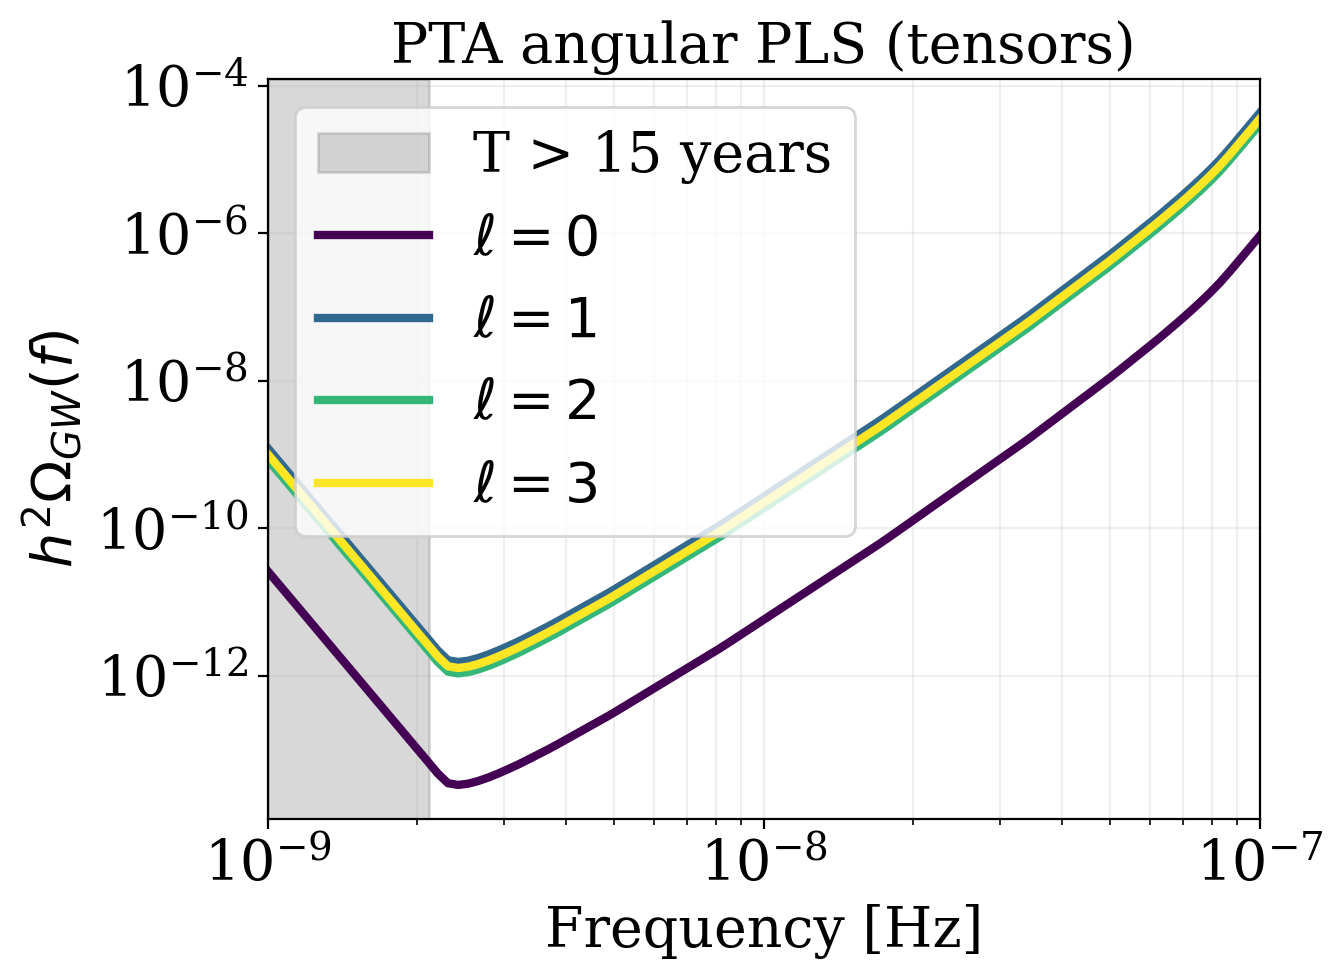

In [ ]:
f = np.logspace(-9, -7, 100)
snr = 1
Tobs = 15
psi=0

colors = cm.viridis(np.linspace(0, 1, 4))

#tensors

T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')


pls_NANOGrav_0 = Sensitivity_ell.PLS_ell_PTA(0, f, snr, Tobs, 1, 't', psi)
pls_NANOGrav_1 = Sensitivity_ell.PLS_ell_PTA(1, f, snr, Tobs, 1e-3, 't', psi)
pls_NANOGrav_2 = Sensitivity_ell.PLS_ell_PTA(2, f, snr, Tobs, 1e-3, 't', psi)
pls_NANOGrav_3 = Sensitivity_ell.PLS_ell_PTA(3, f, snr, Tobs, 1e-3, 't', psi)


plt.loglog(f, pls_NANOGrav_0, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2, label=r'$\ell=2$', color=colors[2])
plt.loglog(f, pls_NANOGrav_3, label=r'$\ell=3$', color=colors[3])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$h^2 \Omega_{GW}(f)$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (tensors)')
plt.grid(which='both', alpha=0.2)

In [ ]:
print(np.min(pls_NANOGrav_0))
print(np.min(pls_NANOGrav_1))
print(np.min(pls_NANOGrav_2))
print(np.min(pls_NANOGrav_3))

3.310210380697769e-14
1.5378712979092805e-12
1.0767741913106695e-12
1.274339597846154e-12


2025-04-13 17:26:54.478 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 17:28:41.751 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 17:33:51.095 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 17:42:34.566 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates


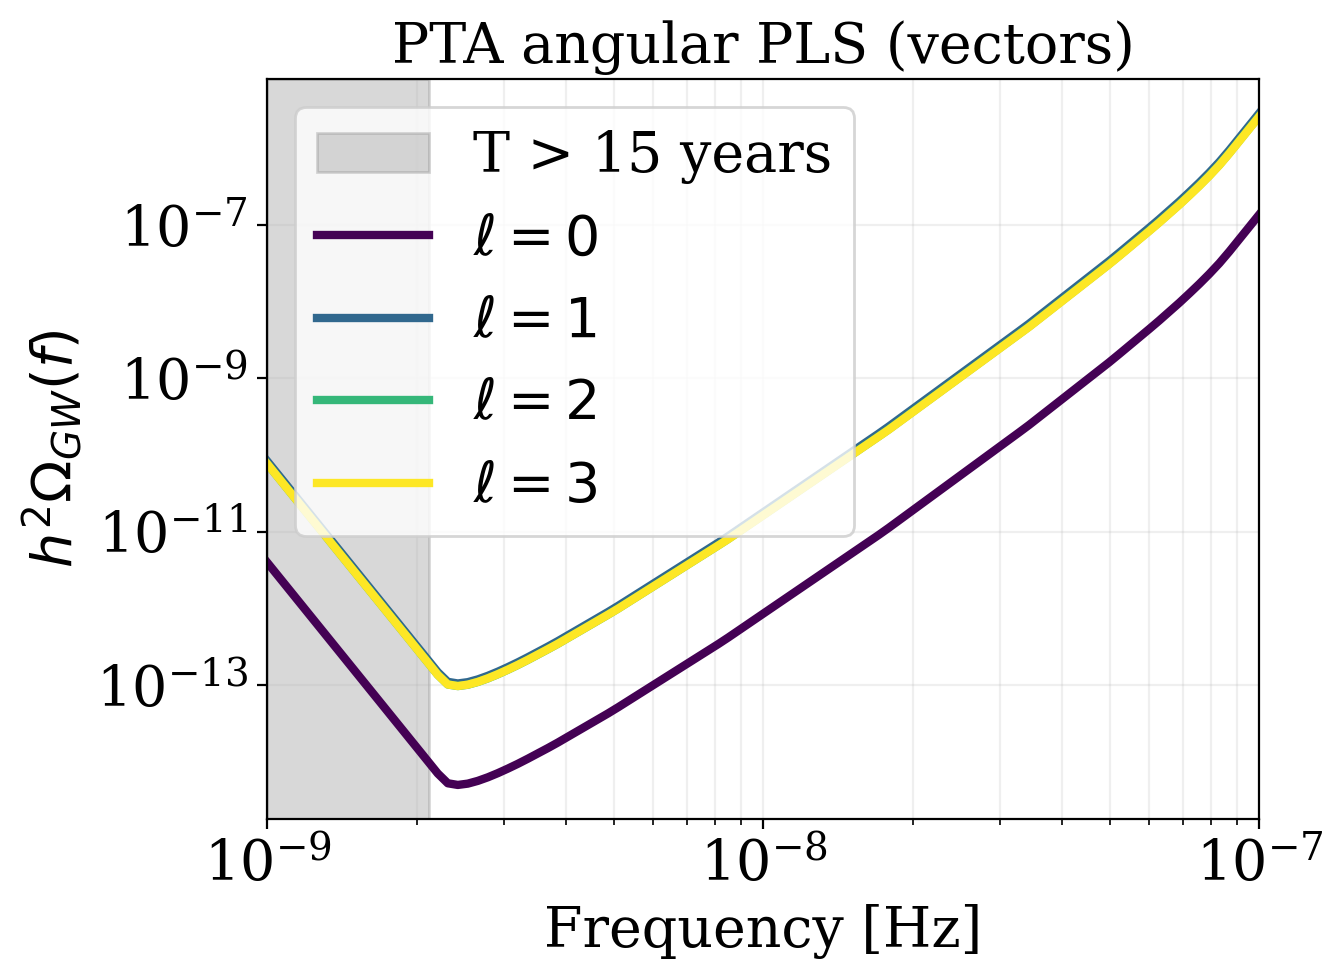

In [ ]:
#vectors

pls_NANOGrav_0 = Sensitivity_ell.PLS_ell_PTA(0, f, snr, Tobs, 1, 'v', psi)
pls_NANOGrav_1 = Sensitivity_ell.PLS_ell_PTA(1, f, snr, Tobs, 1e-3, 'v', psi)
pls_NANOGrav_2 = Sensitivity_ell.PLS_ell_PTA(2, f, snr, Tobs, 1e-3, 'v', psi)
pls_NANOGrav_3 = Sensitivity_ell.PLS_ell_PTA(3, f, snr, Tobs, 1e-3, 'v', psi)

T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')



plt.loglog(f, pls_NANOGrav_0, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2, label=r'$\ell=2$', color=colors[2])
plt.loglog(f, pls_NANOGrav_3, label=r'$\ell=3$', color=colors[3])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$h^2 \Omega_{GW}(f)$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (vectors)')
plt.grid(which='both', alpha=0.2)

In [ ]:
print(np.min(pls_NANOGrav_0))
print(np.min(pls_NANOGrav_1))
print(np.min(pls_NANOGrav_2))
print(np.min(pls_NANOGrav_3))

4.991905474565919e-15
1.0501351988815486e-13
9.71213438058735e-14
9.726224986627935e-14


2025-04-13 16:48:52.561 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 16:50:44.937 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 16:56:06.176 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates
2025-04-13 17:04:57.991 | DEBUG    | pint.models.binary_ddk:validate:210 - Validating DDK model in ECL coordinates


IndexError: index 3 is out of bounds for axis 0 with size 3

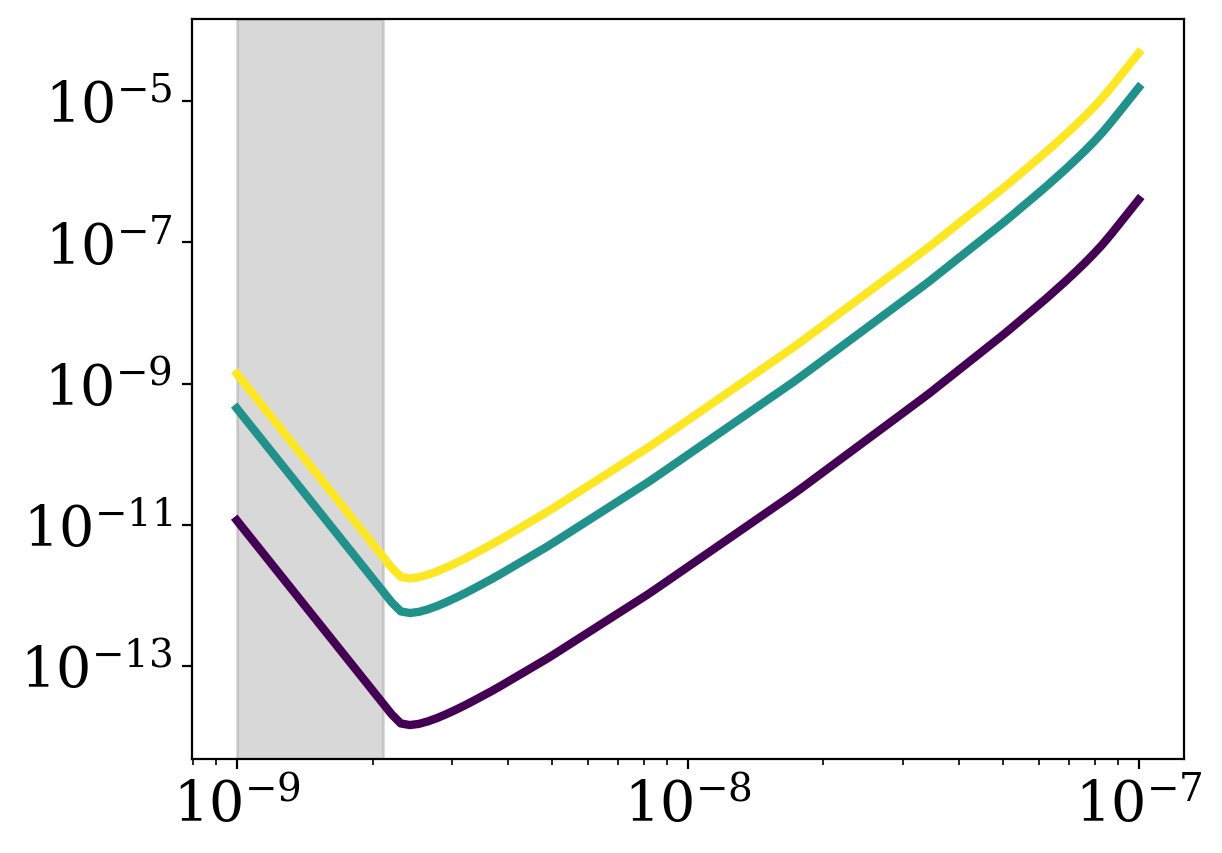

In [ ]:
#scalars

pls_NANOGrav_0 = Sensitivity_ell.PLS_ell_PTA(0, f, snr, Tobs, 1, 's', psi)
pls_NANOGrav_1 = Sensitivity_ell.PLS_ell_PTA(1, f, snr, Tobs, 1e-3, 's', psi)
pls_NANOGrav_2 = Sensitivity_ell.PLS_ell_PTA(2, f, snr, Tobs, 1e-3, 's', psi)
pls_NANOGrav_3 = Sensitivity_ell.PLS_ell_PTA(3, f, snr, Tobs, 1e-3, 's', psi)

T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')

plt.loglog(f, pls_NANOGrav_0, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2, label=r'$\ell=2$', color=colors[2])
plt.loglog(f, pls_NANOGrav_3, label=r'$\ell=3$', color=colors[3])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$h^2 \Omega_{GW}(f)$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (scalars)')
plt.grid(which='both', alpha=0.2)

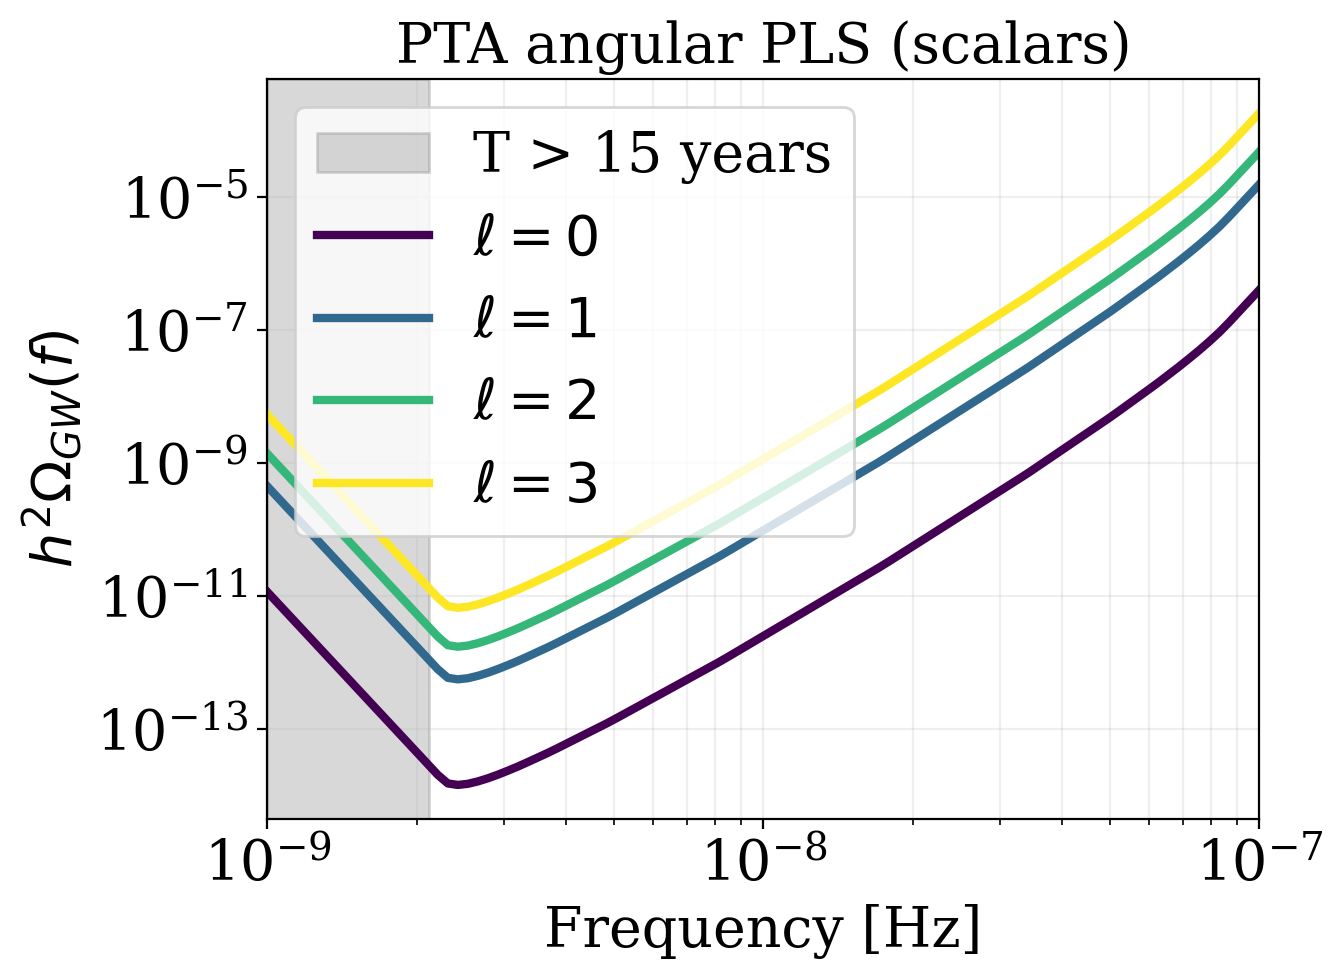

In [ ]:
T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
colors = cm.viridis(np.linspace(0, 1, 4))
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')

plt.loglog(f, pls_NANOGrav_0, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2, label=r'$\ell=2$', color=colors[2])
plt.loglog(f, pls_NANOGrav_3, label=r'$\ell=3$', color=colors[3])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$h^2 \Omega_{GW}(f)$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (scalars)')
plt.grid(which='both', alpha=0.2)

In [ ]:
print(np.min(pls_NANOGrav_0))
print(np.min(pls_NANOGrav_1))
print(np.min(pls_NANOGrav_2))
print(np.min(pls_NANOGrav_3))

1.450870370781445e-14
5.607412761767533e-13
1.7342373108764302e-12
6.6716080994415414e-12


# check on the noise



(1e-24, 1e-21)

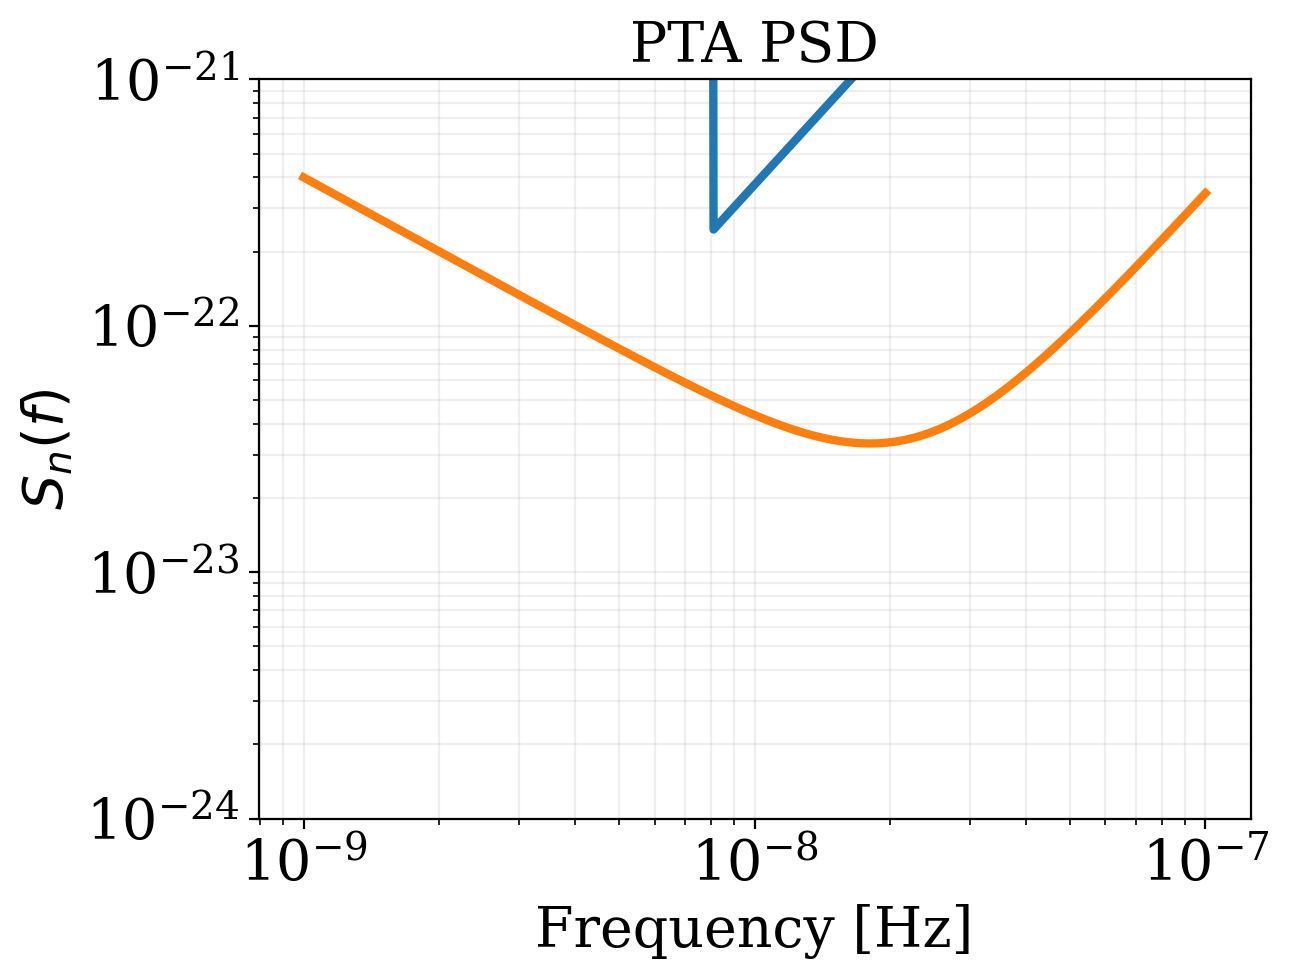

In [ ]:
def PTA_Pn():

    DT = (365*24*3600)/20 # s
    s = 100 * 1e-9 #s
    return 2* (s**2) * DT

def PTA_Sn(f):
        '''
        Returns the power spectral density of the PTA
        '''
        f = np.asarray(f) # Ensure f is a NumPy array
        mask = f >= 8e-9 # Create a boolean mask where True indicates elements greater than or equal to 8e-9
        return np.where(mask, PTA_Pn() * 12 * (np.pi**2) * f**2, 1) # Apply the mask to the result

def PTA_Sn2(f):
      return 4e-31*1/f + 3.41e-8*f**2


f = np.logspace(-9, -7, 100)
PSD = PTA_Sn(f)
PSD2 = PTA_Sn2(f)

plt.loglog(f, PSD)
plt.loglog(f, PSD2)
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_n(f)$')
plt.title('PTA PSD')
plt.grid(which='both', alpha=0.2)
plt.ylim(1e-24, 1e-21)


In [ ]:
# small antenna limit

f = c/(2*np.pi *2.5e9)

print(f)


0.019098593171027443


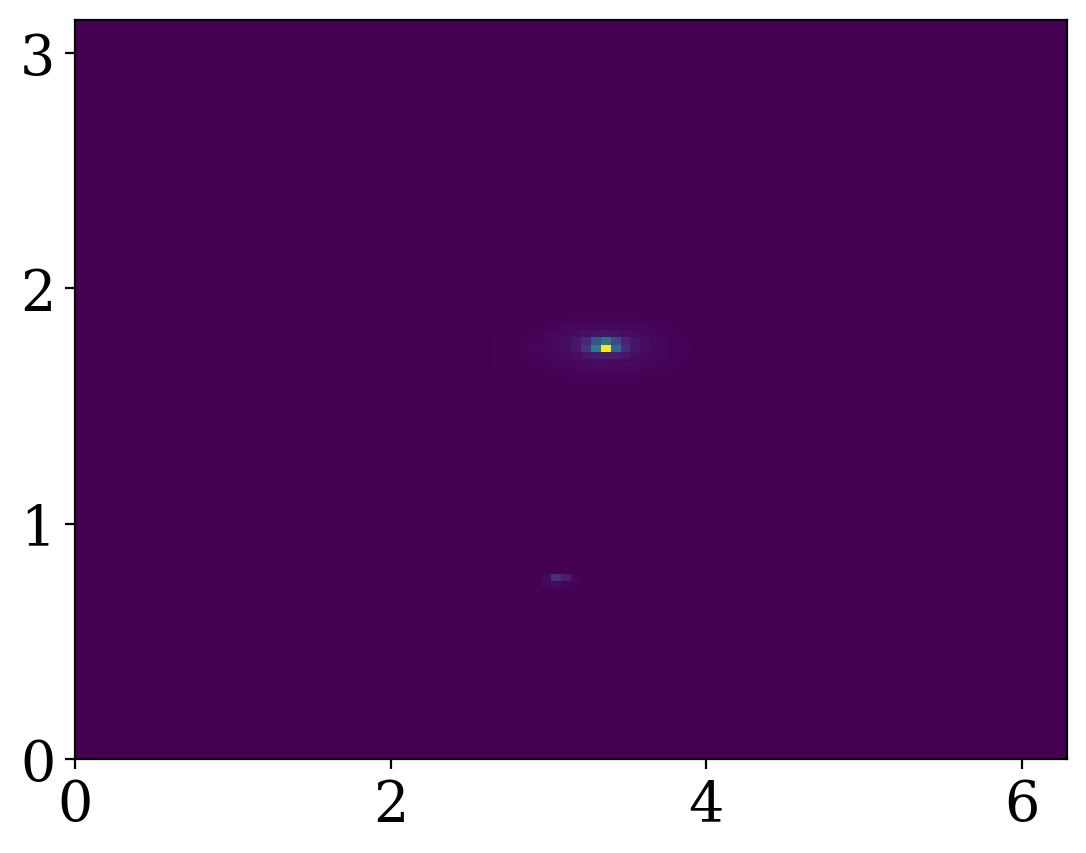

In [ ]:
from gwbird.skymap import Basis

def HD(pi, pj, Omega):
    return  3/4 * (np.einsum('i,i->', pi, pj)- np.einsum('i,ijk->', pi, Omega) * np.einsum('i,ijk->jk', pj, Omega))**2 /((1 + np.einsum('i,ijk->jk', pi, Omega)) * (1 + np.einsum('i,ijk->jk', pj, Omega)) ) - 3/8 * ((1 - np.einsum('i,ijk->jk', pi, Omega)) * (1 - np.einsum('i,ijk->jk', pj, Omega)) )

theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

theta, phi = np.meshgrid(theta, phi)

Omega = Basis.m_n_Omega_basis(theta, phi, 0)[2]

pi = p[0]
pj = p[1]

hd = HD(pi, pj, Omega)

plt.imshow(hd, cmap='viridis', extent=(0, 2*np.pi, 0, np.pi), aspect='auto')